In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/RBInew Bankcode updat july 2021 20250210.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Bank Name,Bank Code,Banktype,Date,Month,Year,ATM(on-site),ATM(off-site),POS(on-line),POS(off-line),...,Amount of credit card transcations via others,No. of Debit Card,No.of debit transcations via ATM,No.of debit transcations via POS,Amount of debit card transactions via ATM(in millions),Amount of debit card transactions via POS(in millions),No.of debit transcations via Online(e-com),Amount of debit transcations via Online(e-com),No.of debit transcations via Others,Amount of debit transcations via Others
0,ALLAHABAD BANK,B003,Public Sector Banks,2016-01-31,1,2016,791.0,421.0,10.0,0.0,...,NaN,8241040,5429027.0,368009.0,14722.487700,535.010038,NaN,NaN,NaN,NaN
1,ANDHRA BANK,B006,Public Sector Banks,2016-01-31,1,2016,2688.0,778.0,2710.0,0.0,...,NaN,16339335,15154444.0,1338812.0,47265.800000,1340.800000,NaN,NaN,NaN,NaN
2,BANK OF BARODA,B014,Public Sector Banks,2016-01-31,1,2016,6055.0,3865.0,30369.0,0.0,...,NaN,31409192,16765491.0,3040289.0,69968.829686,2909.074117,NaN,NaN,NaN,NaN
3,BANK OF INDIA,B015,Public Sector Banks,2016-01-31,1,2016,3365.0,4436.0,5255.0,337.0,...,NaN,34001314,24289438.0,3159205.0,55908.815099,3044.528145,NaN,NaN,NaN,NaN
4,BANK OF MAHARASHTRA,B016,Public Sector Banks,2016-01-31,1,2016,1288.0,571.0,0.0,0.0,...,NaN,5660670,5896648.0,399438.0,19644.793924,719.159670,NaN,NaN,NaN,NaN


##Count

In [ ]:
df['Bank Name'].unique()


array(['ALLAHABAD BANK', 'ANDHRA BANK', 'BANK OF BARODA', 'BANK OF INDIA',
       'BANK OF MAHARASHTRA', 'CANARA BANK', 'CENTRAL BANK OF INDIA',
       'CORPORATION BANK', 'DENA BANK', 'INDIAN BANK',
       'INDIAN OVERSEAS BANK', 'ORIENTAL BANK OF COMMERCE',
       'PUNJAB AND SIND BANK', 'PUNJAB NATIONAL BANK', 'SYNDICATE BANK',
       'UCO BANK', 'UNION BANK OF INDIA', 'UNITED BANK OF INDIA',
       'VIJAYA BANK', 'IDBI LTD', 'STATE BANK OF BIKANER AND JAIPUR',
       'STATE BANK OF HYDERABAD', 'STATE BANK OF INDIA',
       'STATE BANK OF MYSORE', 'STATE BANK OF PATIALA',
       'STATE BANK OF TRAVANCORE', 'AXIS BANK LTD', 'BANDHAN BANK',
       'CATHOLIC SYRIAN BANK LTD', 'CITY UNION BANK',
       'DEVELOPMENT CREDIT BANK ', 'DHANALAKSHMI BANK LTD',
       'FEDERAL BANK LTD', 'HDFC BANK LTD', 'ICICI BANK LTD',
       'IDFC BANK LTD', 'INDUSIND BANK LTD', 'JAMMU AND KASHMIR BANK',
       'KARNATAKA BANK LTD', 'KARUR VYSYA BANK LTD',
       'KOTAK MAHINDRA BANK LTD', 'RATNAKAR BANK L

In [ ]:
df['Bank Name'].nunique()

132

In [ ]:
# Group by 'Bank Type' and count unique bank names in each group
unique_banks_by_type = df.groupby('Banktype')['Bank Name'].nunique()
print("Unique Bank Names by Bank Type:\n")
print(unique_banks_by_type)


Unique Bank Names by Bank Type:

Banktype
Foreign Banks           21
Payment Banks           15
Private Sector Banks    37
Public Sector Banks     25
Small Finance Banks     34
Name: Bank Name, dtype: int64


In [ ]:
for index, row in df[['Bank Name', 'Banktype']].drop_duplicates().sort_values('Bank Name').iterrows():
    print(f"{row['Bank Name']}  -->  {row['Banktype']}")


ADITYA BIRLA IDEA PAYMENTS BANK  -->  Payment Banks
AIRTEL PAYMENTS BANK  -->  Payment Banks
ALLAHABAD BANK  -->  Public Sector Banks
AMERICAN EXPRESS  -->  Foreign Banks
AMERICAN EXPRESS BANKING CORPORATION  -->  Foreign Banks
ANDHRA BANK  -->  Public Sector Banks
AU SMALL FINANCE BANK LIMITED  -->  Small Finance Banks
AU SMALL FINANCE BANK LTD  -->  Small Finance Banks
AXIS BANK LTD  -->  Private Sector Banks
Aditya Birla Idea Payments Bank  -->  Payment Banks
Airtel Payments Bank  -->  Payment Banks
Au Small Finance Bank Limited  -->  Small Finance Banks
BANDHAN BANK  -->  Private Sector Banks
BANDHAN BANK LTD  -->  Private Sector Banks
BANK OF AMERICA  -->  Foreign Banks
BANK OF BAHRAIN & KUWAIT B.S.C.  -->  Foreign Banks
BANK OF BARODA  -->  Public Sector Banks
BANK OF INDIA  -->  Public Sector Banks
BANK OF MAHARASHTRA  -->  Public Sector Banks
BARCLAYS BANK PLC  -->  Foreign Banks
Bandhan Bank Ltd  -->  Private Sector Banks
CANARA BANK  -->  Public Sector Banks
CAPITAL SMALL FIN

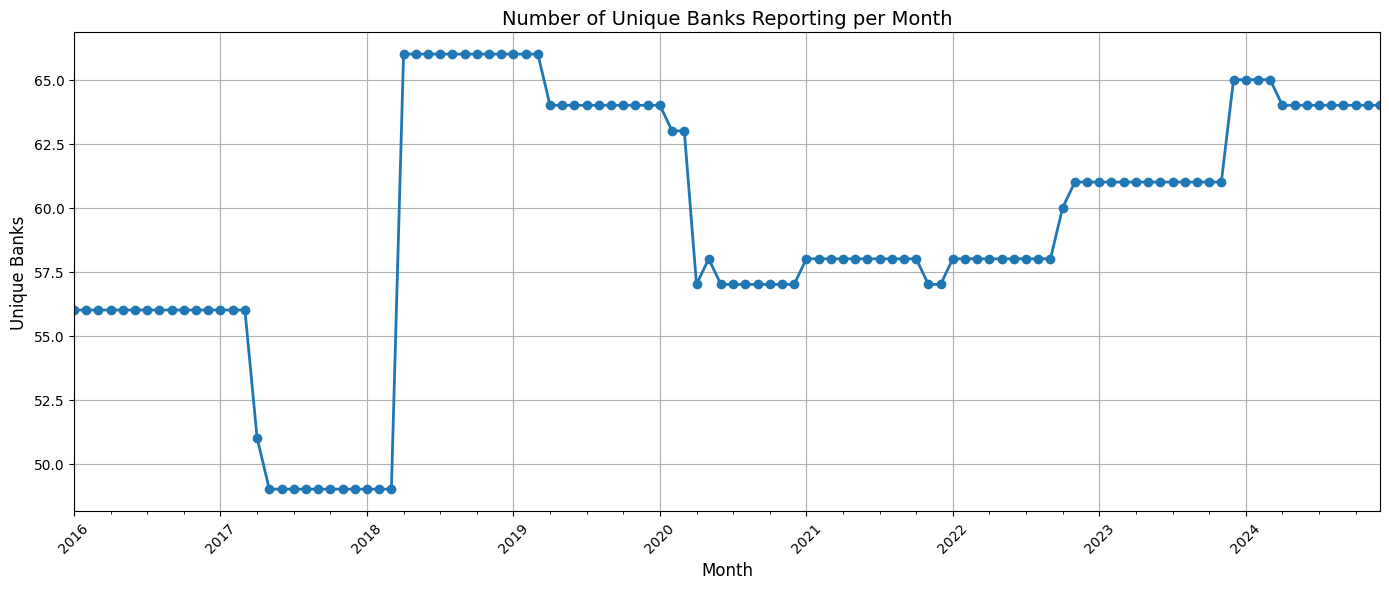

In [ ]:
# Convert 'Date' column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Group by each date and count unique banks
monthly_bank_count = df.groupby('Date')['Bank Name'].nunique()

# Plot the result
plt.figure(figsize=(14,6))
monthly_bank_count.plot(marker='o', linewidth=2)
plt.title("Number of Unique Banks Reporting per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Unique Banks", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Count unique banks per month
monthly_bank_count = df.groupby('Date')['Bank Name'].nunique()

# Find the highest and lowest values and their dates
max_count = monthly_bank_count.max()
max_date = monthly_bank_count.idxmax()

min_count = monthly_bank_count.min()
min_date = monthly_bank_count.idxmin()

print(f"Highest number of banks: {max_count} on {max_date.strftime('%B %Y')}")
print(f"Lowest number of banks: {min_count} on {min_date.strftime('%B %Y')}")


Highest number of banks: 66 on April 2018
Lowest number of banks: 49 on May 2017


In [ ]:
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get list of unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type
for btype in bank_types:
    subset = df[df['Banktype'] == btype]
    monthly_counts = subset.groupby('Date')['Bank Name'].nunique()

    max_val = monthly_counts.max()
    max_date = monthly_counts.idxmax()

    min_val = monthly_counts.min()
    min_date = monthly_counts.idxmin()

    print(f"\n{btype}")
    print(f"  Highest: {max_val} banks on {max_date.strftime('%B %Y')}")
    print(f"  Lowest : {min_val} banks on {min_date.strftime('%B %Y')}")



Public Sector Banks
  Highest: 25 banks on January 2016
  Lowest : 12 banks on April 2020

Private Sector Banks
  Highest: 21 banks on January 2016
  Lowest : 20 banks on November 2021

Foreign Banks
  Highest: 14 banks on December 2023
  Lowest : 8 banks on May 2017

Payment Banks
  Highest: 7 banks on April 2018
  Lowest : 6 banks on February 2020

Small Finance Banks
  Highest: 12 banks on October 2022
  Lowest : 10 banks on April 2018


<Figure size 1400x600 with 0 Axes>

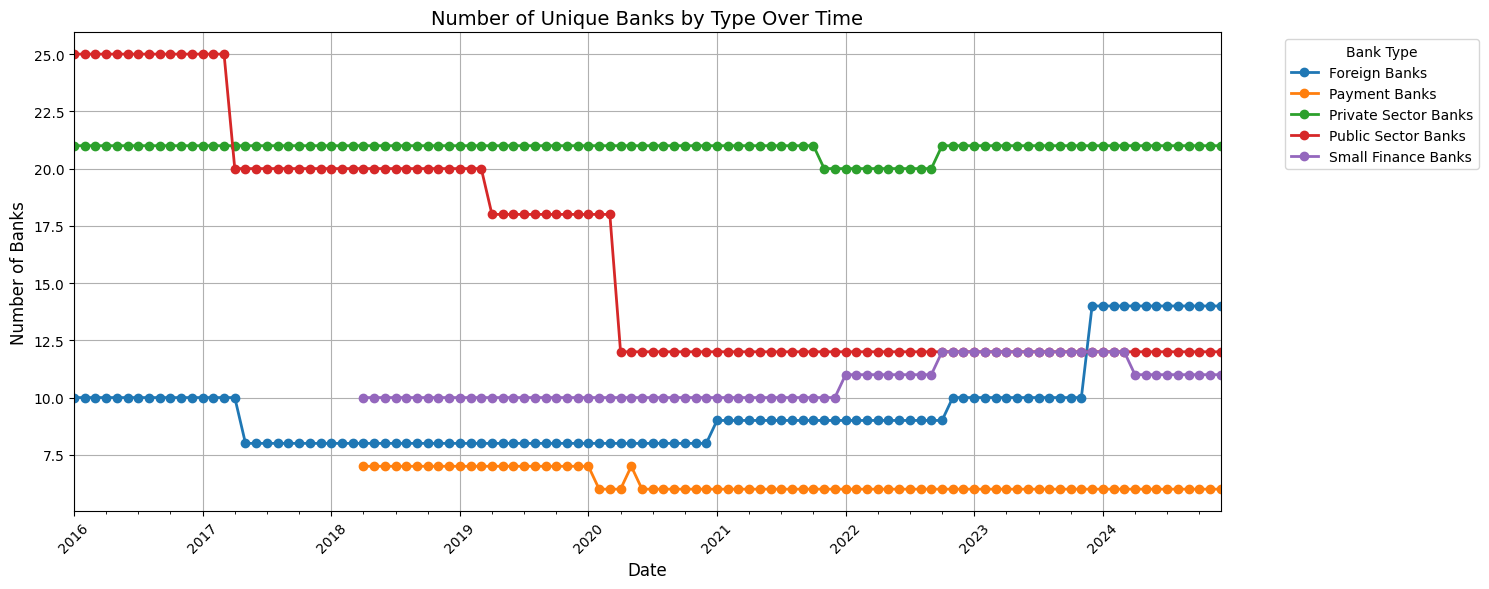

In [ ]:
# Ensure date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and Banktype, then count unique Bank Names
bank_type_trend = df.groupby(['Date', 'Banktype'])['Bank Name'].nunique().reset_index()

# Pivot the table to get Banktype as columns
pivot_table = bank_type_trend.pivot(index='Date', columns='Banktype', values='Bank Name')

# Plot the trend
plt.figure(figsize=(14,6))
pivot_table.plot(marker='o', linewidth=2, figsize=(15,6))

plt.title("Number of Unique Banks by Type Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Banks", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Bank Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##atms

Public Sector Banks
  Monthly Avg ATM (On-site):  78879.02
  Monthly Avg ATM (Off-site): 58719.08



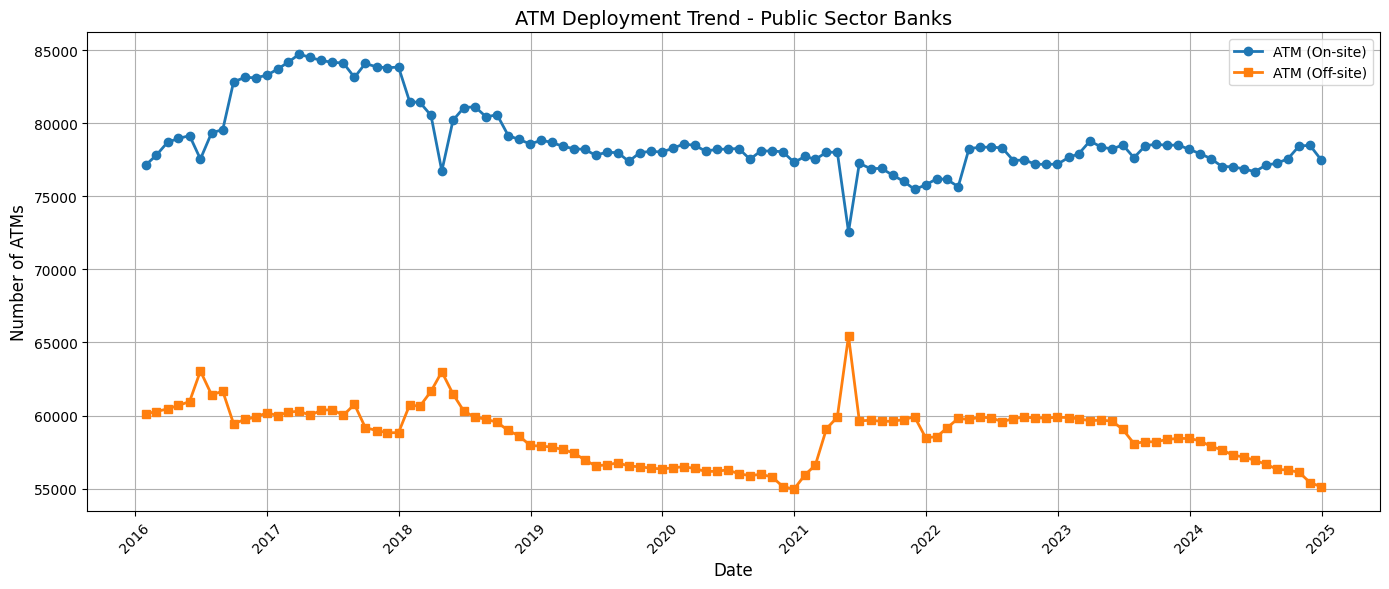

Private Sector Banks
  Monthly Avg ATM (On-site):  33479.19
  Monthly Avg ATM (Off-site): 36852.47



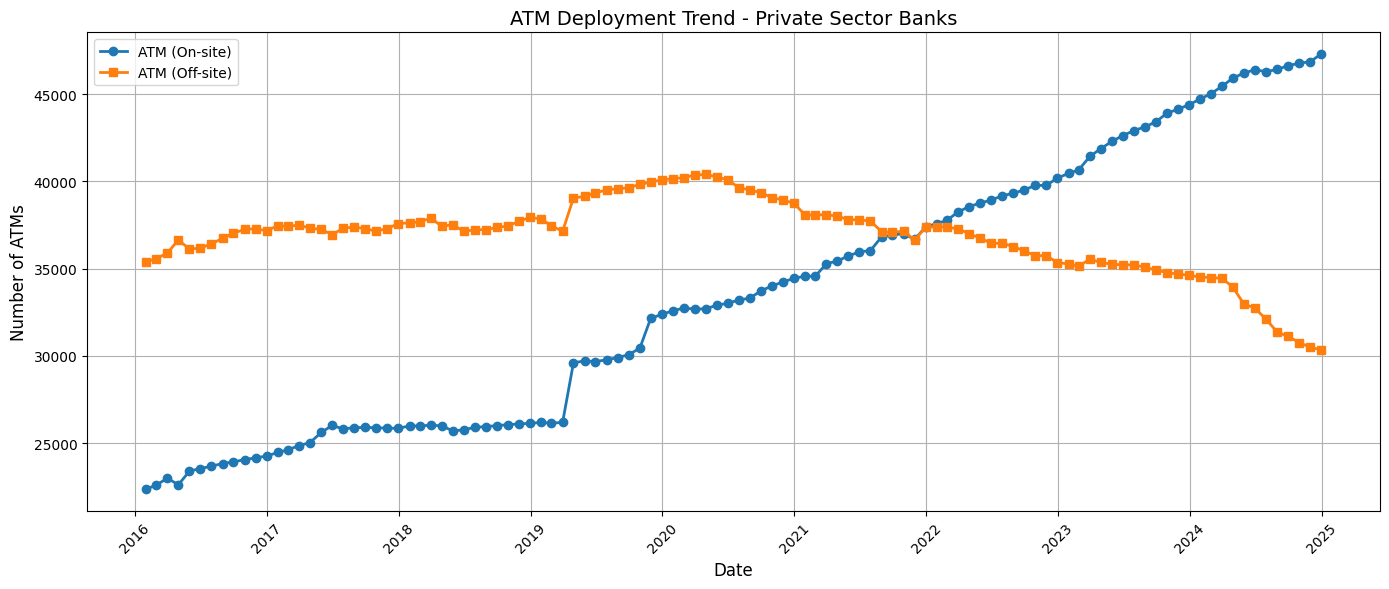

Foreign Banks
  Monthly Avg ATM (On-site):  374.15
  Monthly Avg ATM (Off-site): 718.29



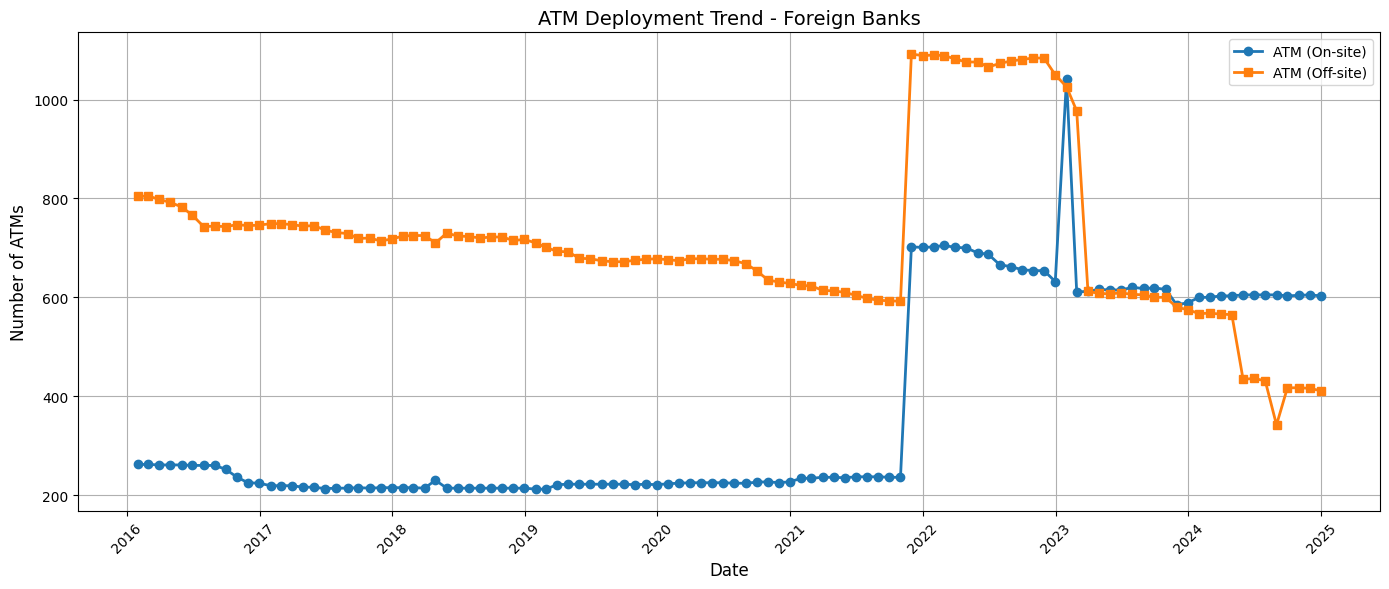

Payment Banks
  Monthly Avg ATM (On-site):  0.94
  Monthly Avg ATM (Off-site): 24.62



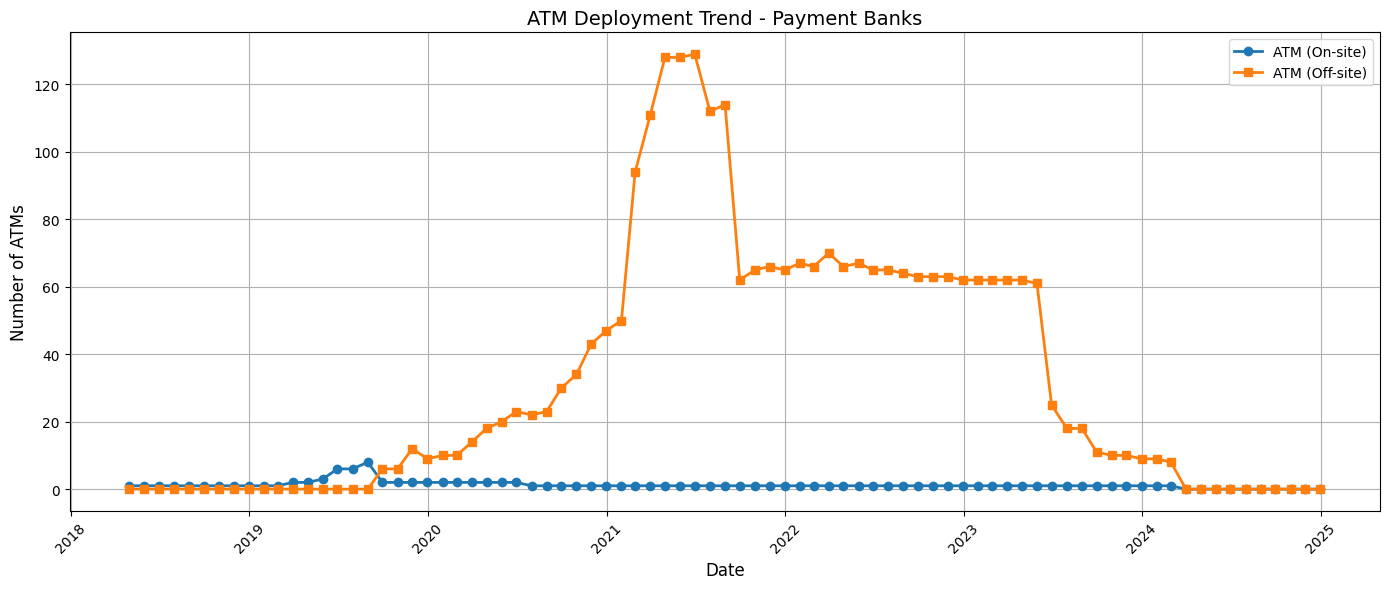

Small Finance Banks
  Monthly Avg ATM (On-site):  1666.19
  Monthly Avg ATM (Off-site): 58.69



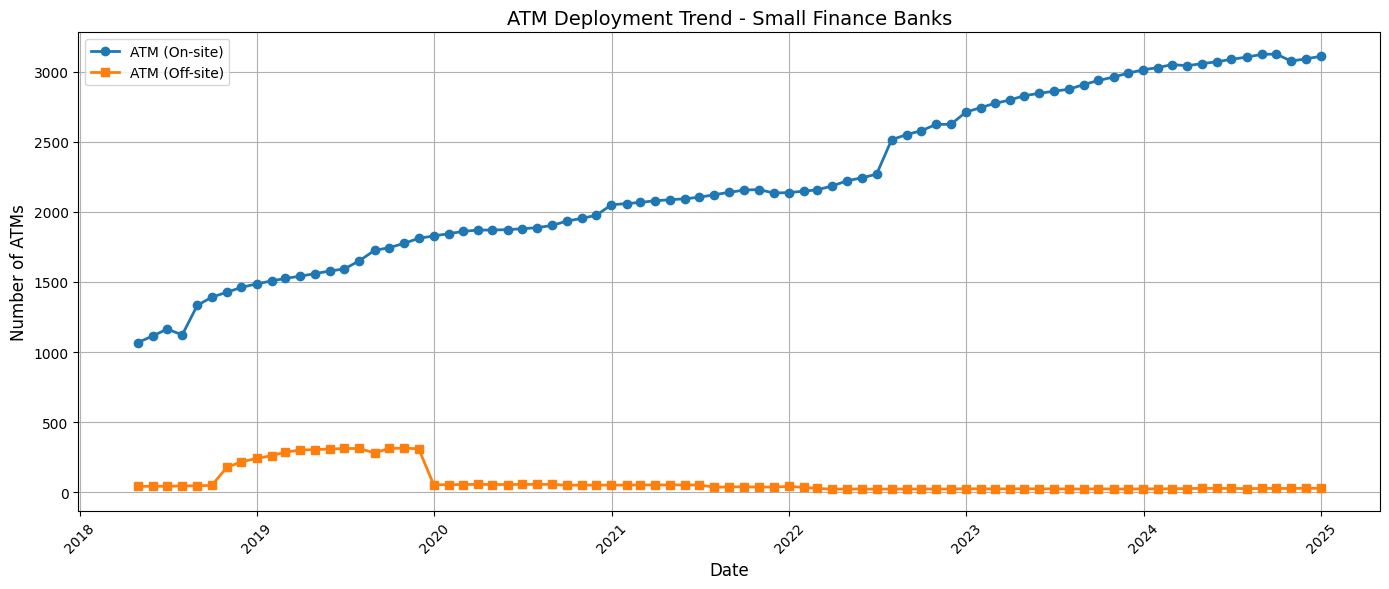

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Total number of unique months in the dataset
num_months = df['Date'].nunique()

# Get list of unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type
for btype in bank_types:
    # Filter data for this bank type
    subset = df[df['Banktype'] == btype]

    # Group by Date and sum ATM counts
    atm_trend = subset.groupby('Date')[['ATM(on-site)', 'ATM(off-site)']].sum().reset_index()

    # Compute overall totals (not averages per row, but total sum over all time)
    total_onsite = atm_trend['ATM(on-site)'].sum()
    total_offsite = atm_trend['ATM(off-site)'].sum()

    # Monthly averages (total ÷ number of months)
    avg_onsite = total_onsite / num_months
    avg_offsite = total_offsite / num_months

    # Print the monthly averages
    print(f"{btype}")
    print(f"  Monthly Avg ATM (On-site):  {avg_onsite:.2f}")
    print(f"  Monthly Avg ATM (Off-site): {avg_offsite:.2f}\n")

    # Plotting point-line graph
    plt.figure(figsize=(14,6))
    plt.plot(atm_trend['Date'], atm_trend['ATM(on-site)'], label='ATM (On-site)', marker='o', linewidth=2)
    plt.plot(atm_trend['Date'], atm_trend['ATM(off-site)'], label='ATM (Off-site)', marker='s', linewidth=2)

    plt.title(f'ATM Deployment Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of ATMs', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


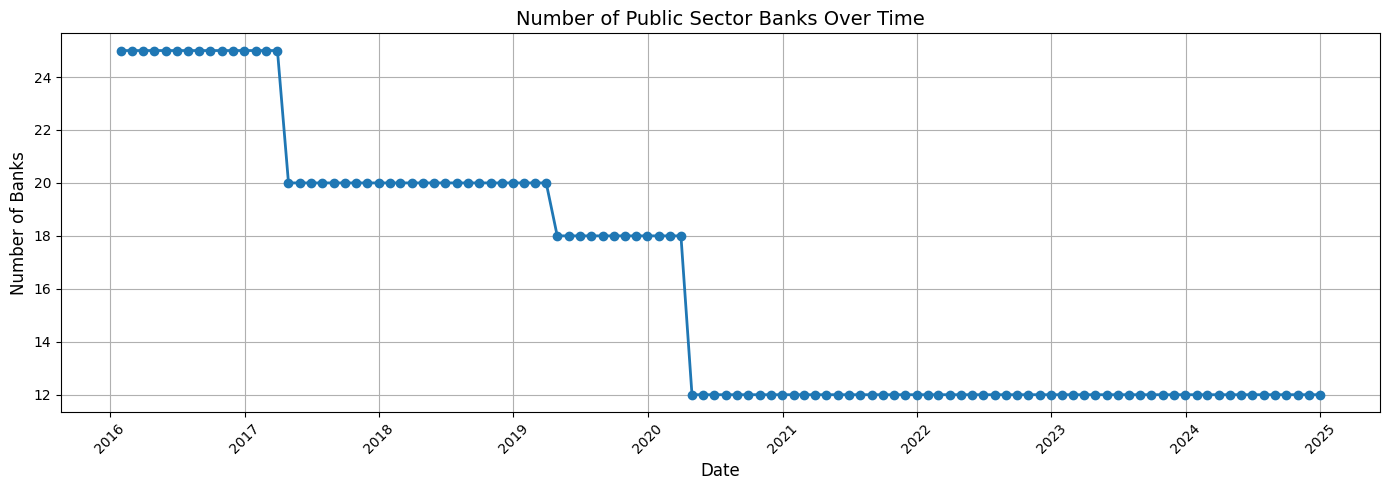

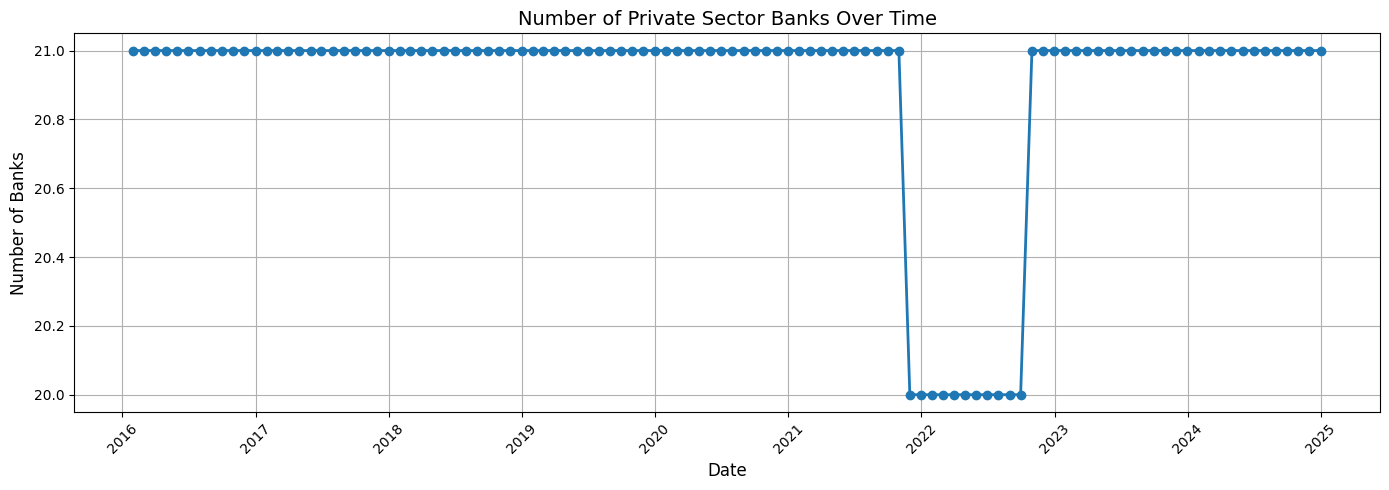

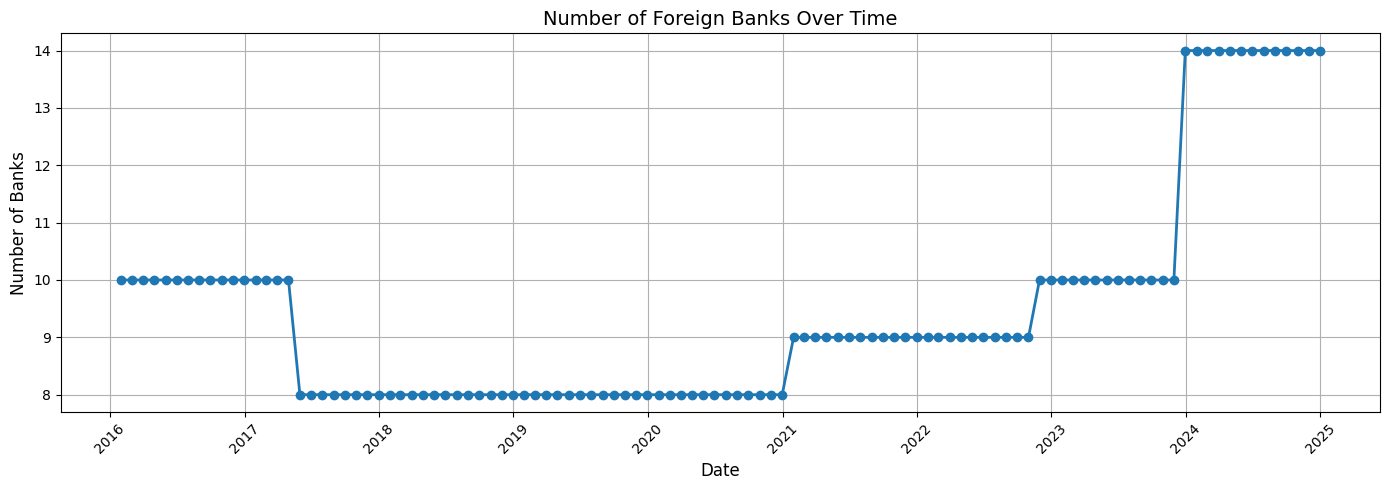

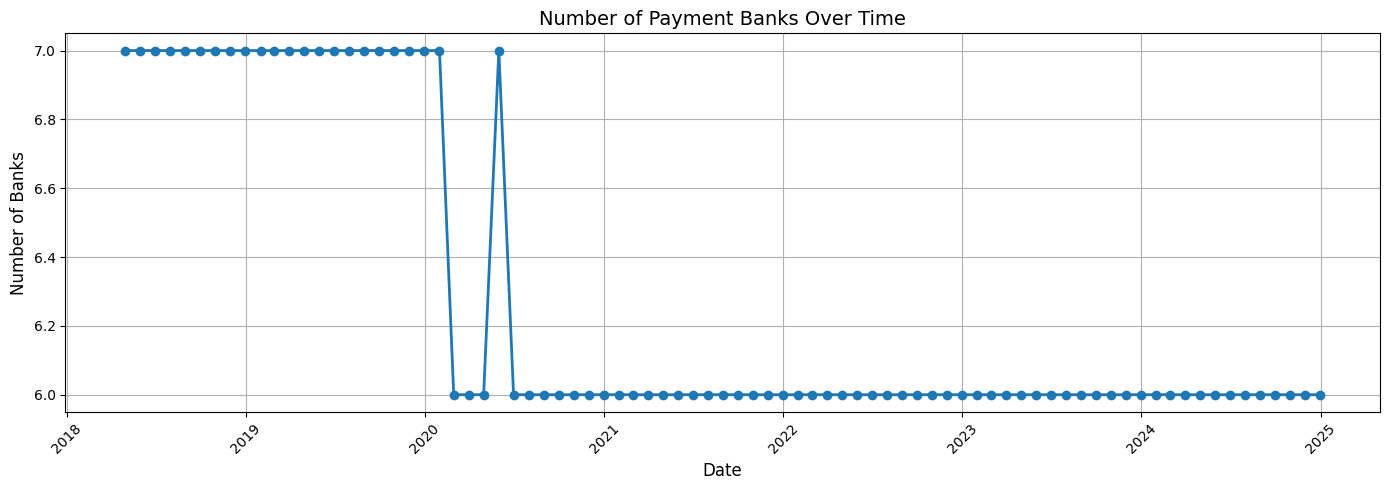

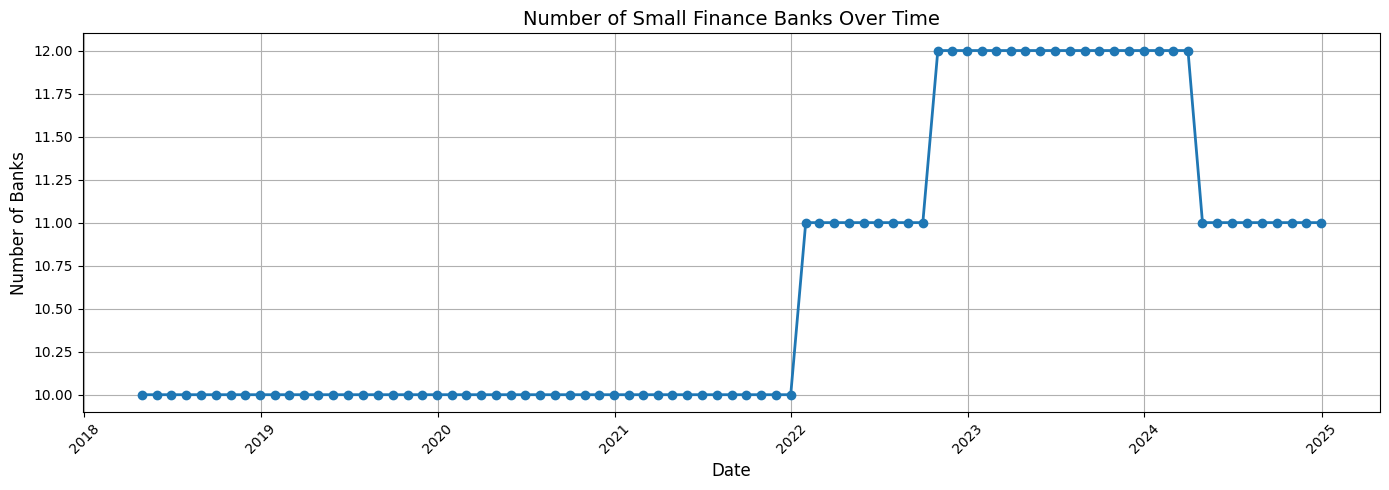

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get all unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type and plot individually
for btype in bank_types:
    subset = df[df['Banktype'] == btype]

    # Count unique banks per month
    bank_count = subset.groupby('Date')['Bank Name'].nunique().reset_index()

    # Plot
    plt.figure(figsize=(14,5))
    plt.plot(bank_count['Date'], bank_count['Bank Name'], marker='o', linewidth=2)

    plt.title(f"Number of {btype} Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of Banks", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## pos and other remaining source

Public Sector Banks
  Monthly Avg POS (On-line):  759172.31
  Monthly Avg POS (Off-line): 108.42



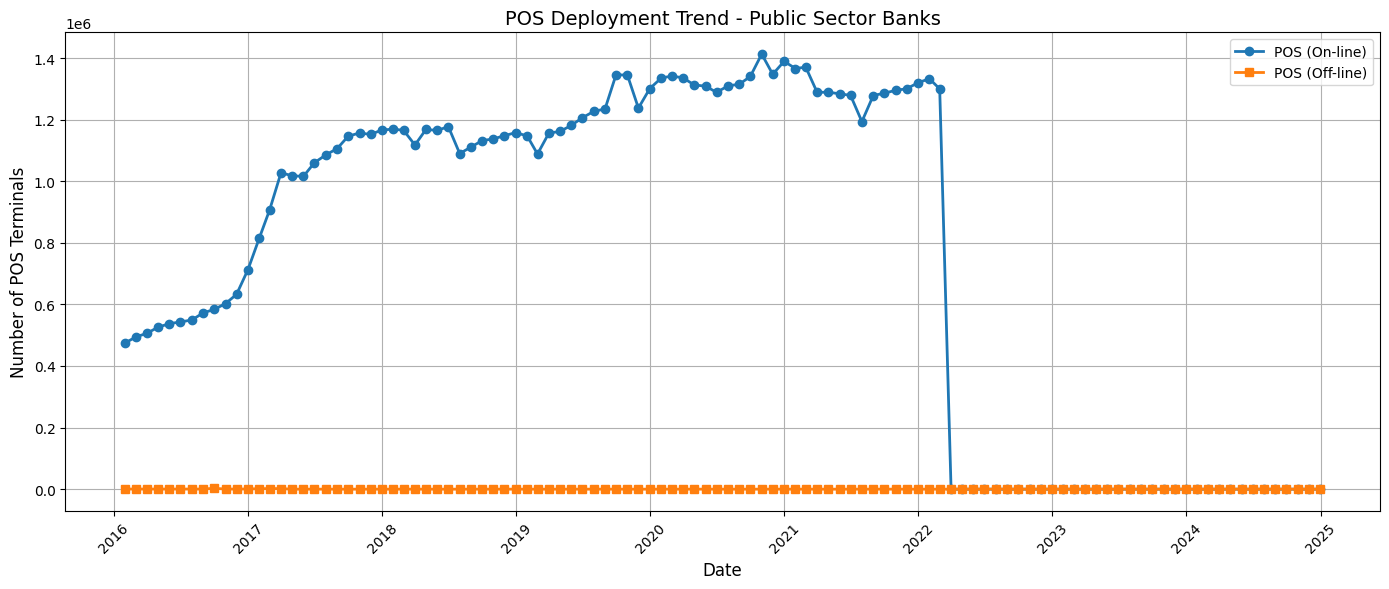

Private Sector Banks
  Monthly Avg POS (On-line):  1567323.51
  Monthly Avg POS (Off-line): 31.21



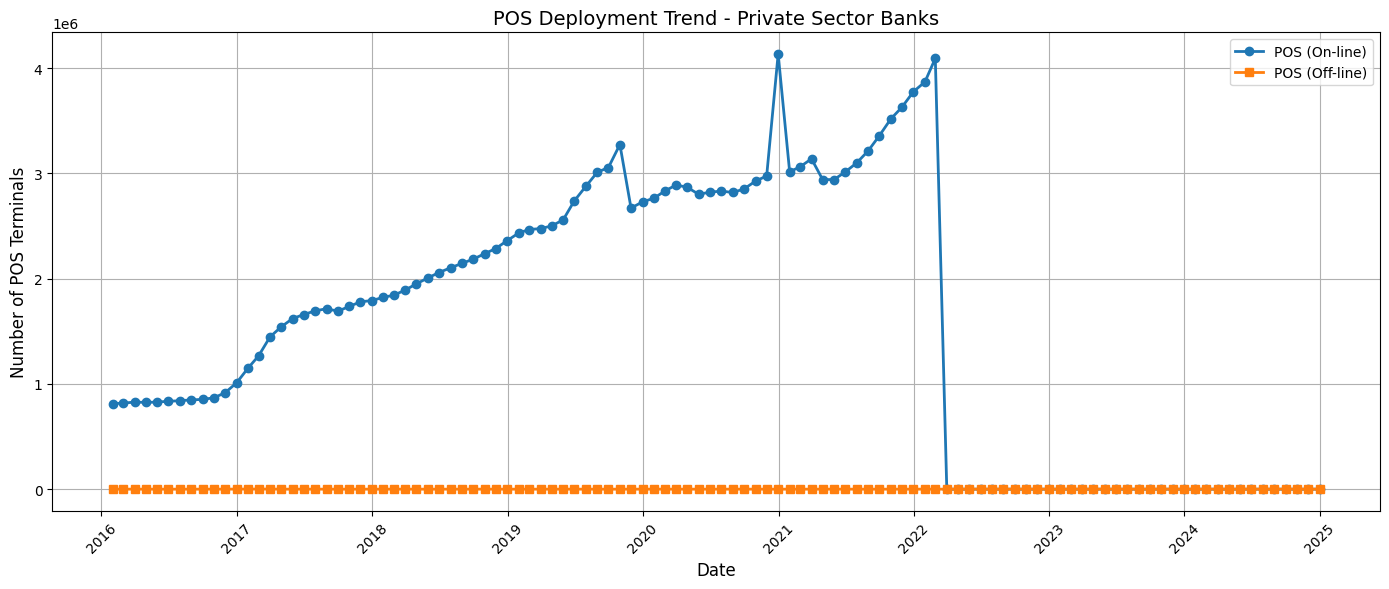

Foreign Banks
  Monthly Avg POS (On-line):  40214.96
  Monthly Avg POS (Off-line): 0.00



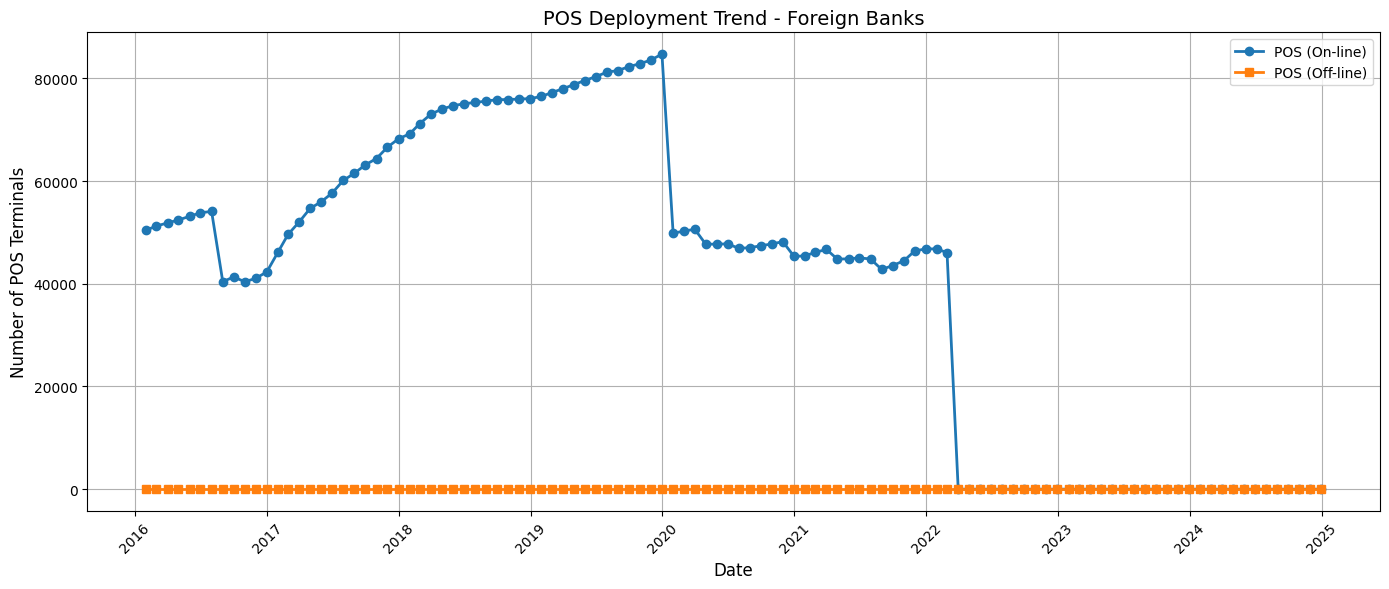

Payment Banks
  Monthly Avg POS (On-line):  62588.02
  Monthly Avg POS (Off-line): 0.00



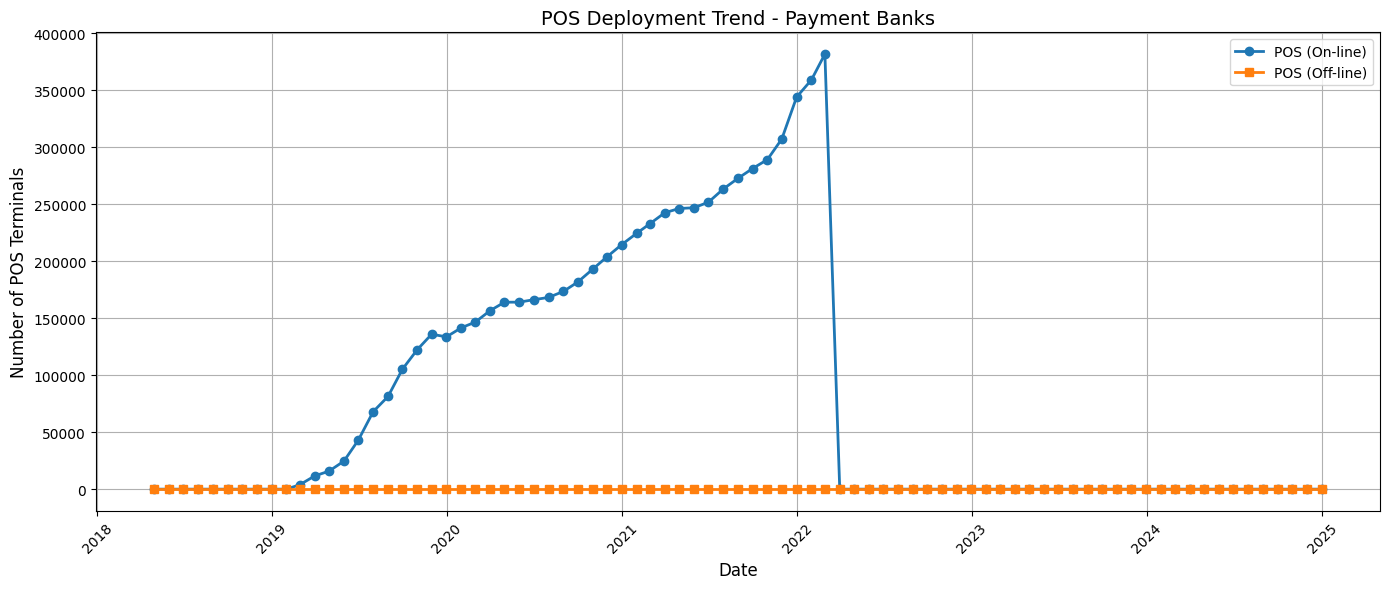

Small Finance Banks
  Monthly Avg POS (On-line):  862.56
  Monthly Avg POS (Off-line): 0.00



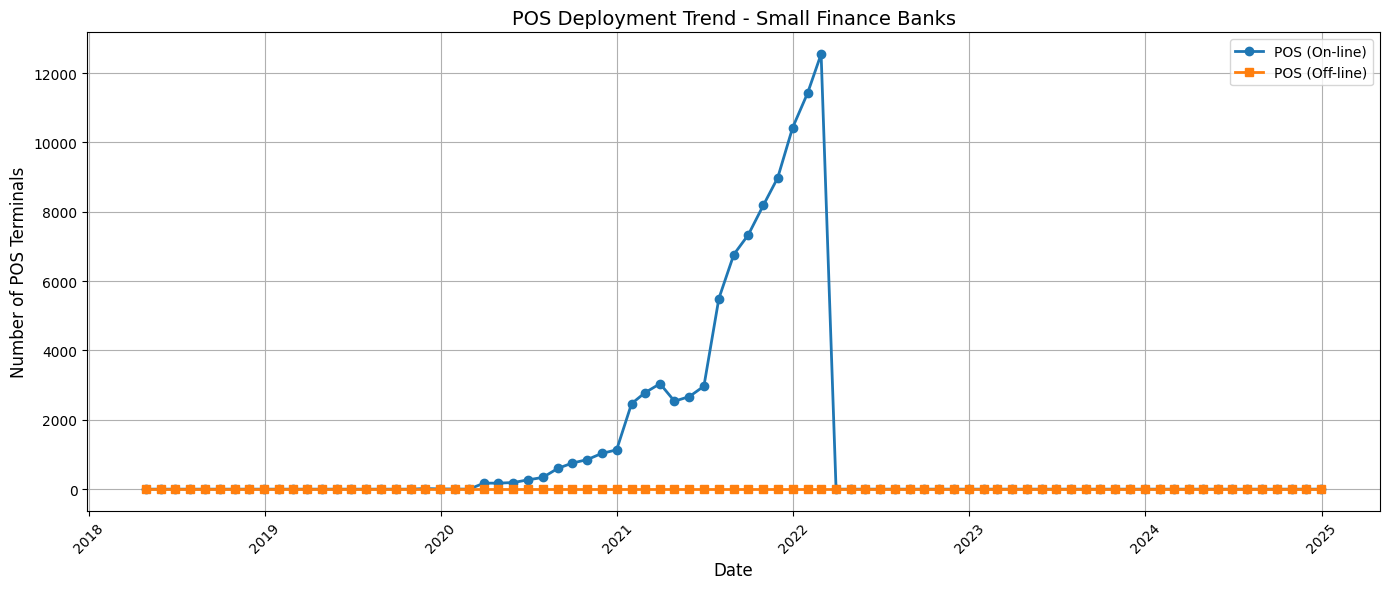

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get total number of unique months in the dataset
num_months = df['Date'].nunique()

# List of unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type
for btype in bank_types:
    # Filter data for the current bank type
    subset = df[df['Banktype'] == btype]

    # Group by Date and sum POS values
    pos_trend = subset.groupby('Date')[['POS(on-line)', 'POS(off-line)']].sum().reset_index()

    # Compute overall totals
    total_online = pos_trend['POS(on-line)'].sum()
    total_offline = pos_trend['POS(off-line)'].sum()

    # Monthly averages
    avg_online = total_online / num_months
    avg_offline = total_offline / num_months

    # Print results
    print(f"{btype}")
    print(f"  Monthly Avg POS (On-line):  {avg_online:.2f}")
    print(f"  Monthly Avg POS (Off-line): {avg_offline:.2f}\n")

    # Plot point-line graph
    plt.figure(figsize=(14,6))
    plt.plot(pos_trend['Date'], pos_trend['POS(on-line)'], label='POS (On-line)', marker='o', linewidth=2)
    plt.plot(pos_trend['Date'], pos_trend['POS(off-line)'], label='POS (Off-line)', marker='s', linewidth=2)

    plt.title(f'POS Deployment Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of POS Terminals', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Public Sector Banks
  Monthly Avg Micro ATMs (since Apr 2020):  147526.30



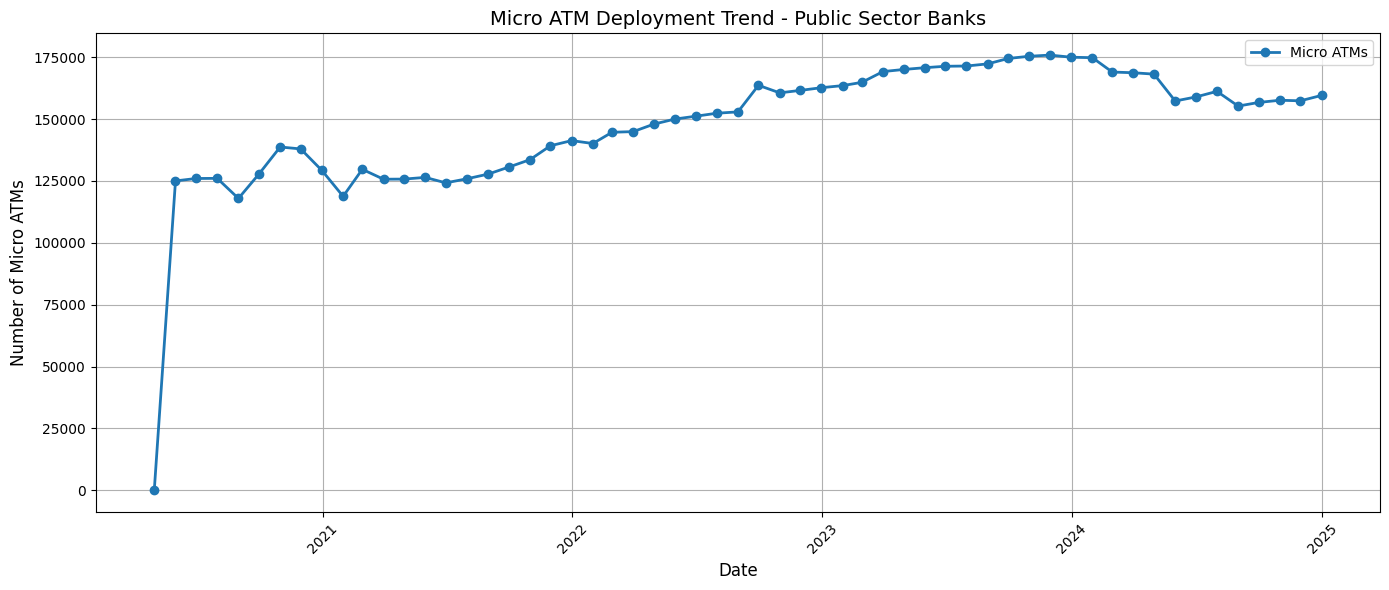

Private Sector Banks
  Monthly Avg Micro ATMs (since Apr 2020):  117041.14



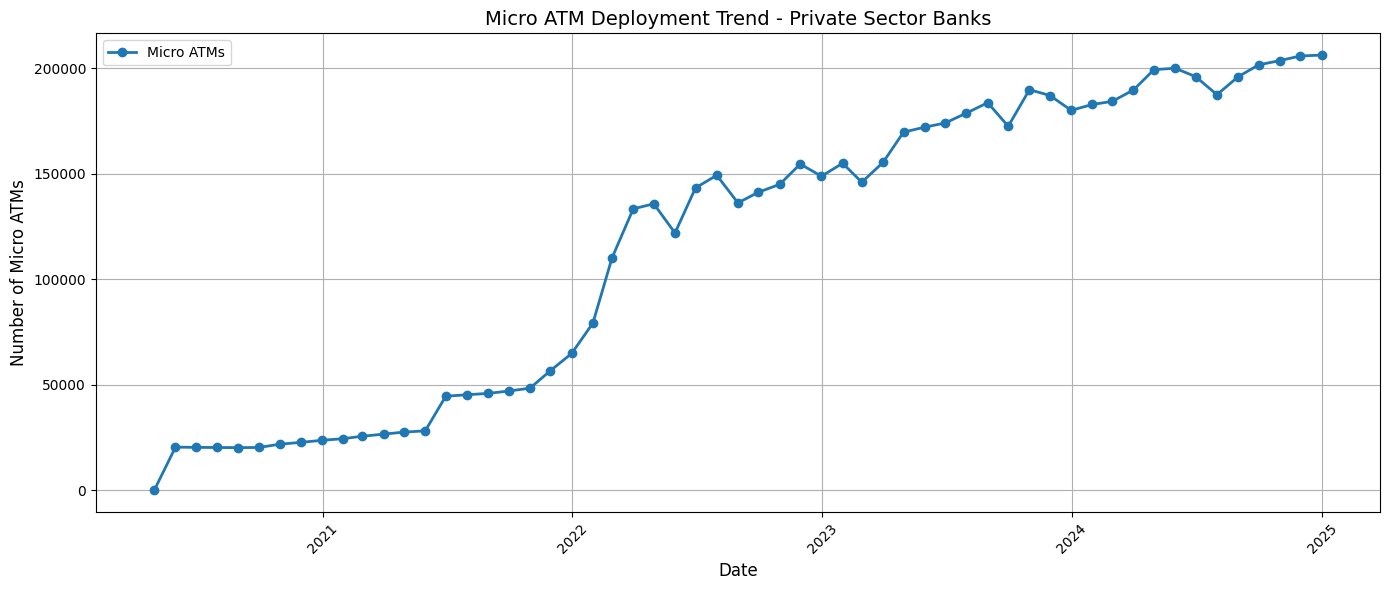

Foreign Banks
  Monthly Avg Micro ATMs (since Apr 2020):  87485.35



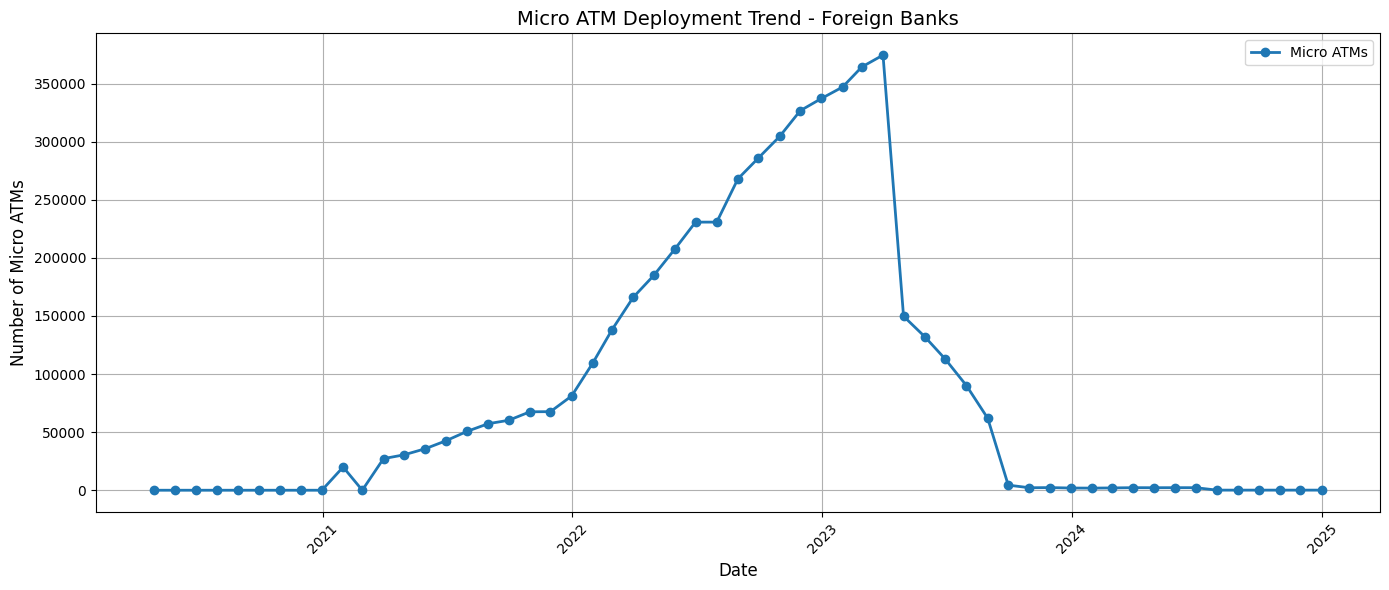

Payment Banks
  Monthly Avg Micro ATMs (since Apr 2020):  718324.19



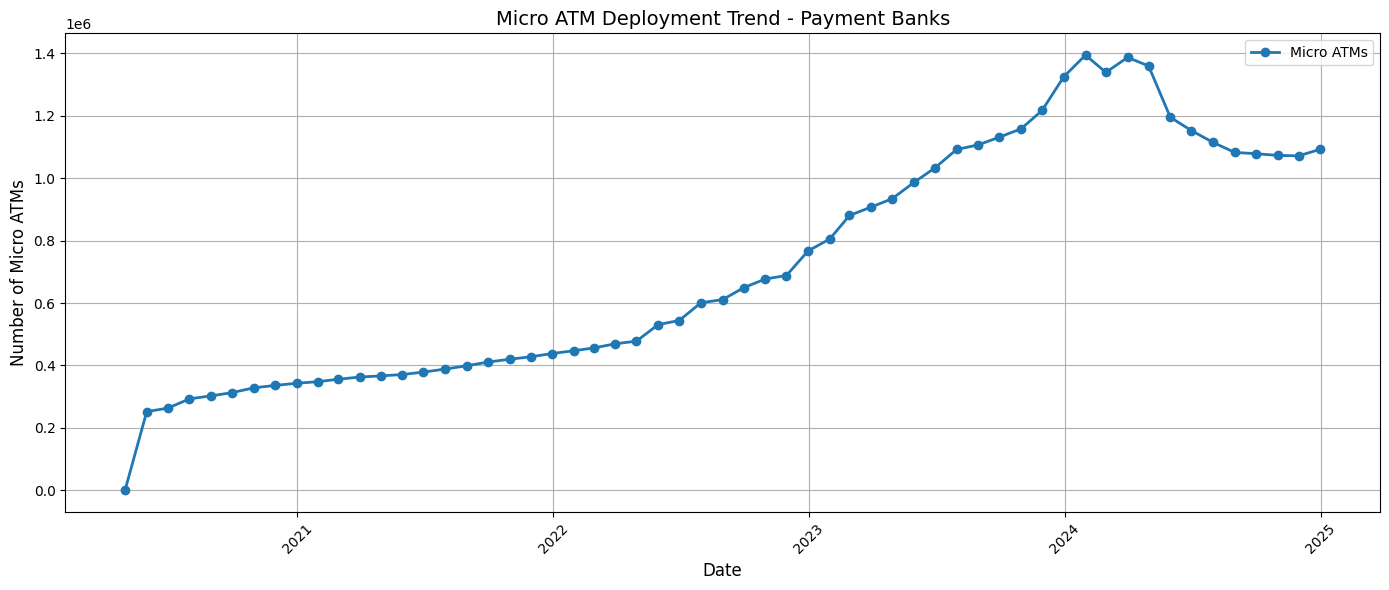

Small Finance Banks
  Monthly Avg Micro ATMs (since Apr 2020):  3224.46



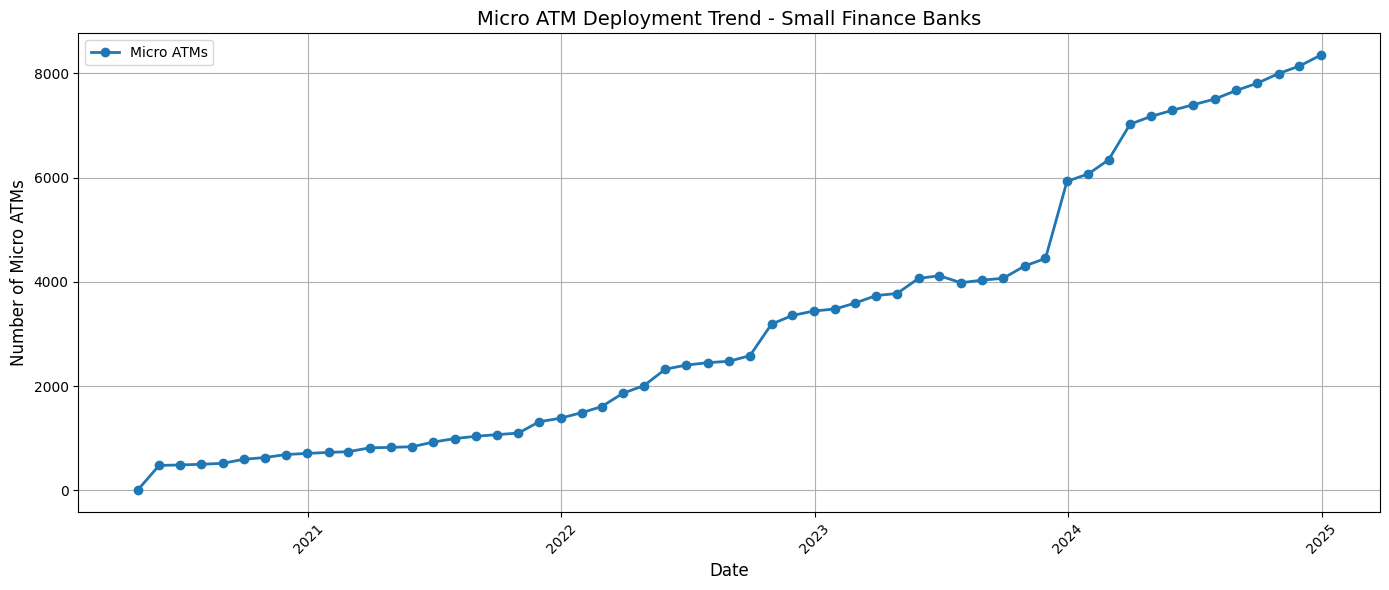

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data starting from April 2020
df_micro = df[df['Date'] >= '2020-04-01']

# Get updated number of months from April 2020 onward
num_months = df_micro['Date'].nunique()

# Unique bank types
bank_types = df_micro['Banktype'].unique()

# Loop for each bank type
for btype in bank_types:
    subset = df_micro[df_micro['Banktype'] == btype]

    # Group by date and sum micro ATM counts
    micro_trend = subset.groupby('Date')['Micro ATMs'].sum().reset_index()

    # Calculate total and average
    total_micro = micro_trend['Micro ATMs'].sum()
    avg_micro = total_micro / num_months

    # Print result
    print(f"{btype}")
    print(f"  Monthly Avg Micro ATMs (since Apr 2020):  {avg_micro:.2f}\n")

    # Plotting
    plt.figure(figsize=(14,6))
    plt.plot(micro_trend['Date'], micro_trend['Micro ATMs'], marker='o', linewidth=2, label='Micro ATMs')

    plt.title(f'Micro ATM Deployment Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Micro ATMs', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Public Sector Banks
  Monthly Avg Bharat QR Codes (since Apr 2020):  1560365.79



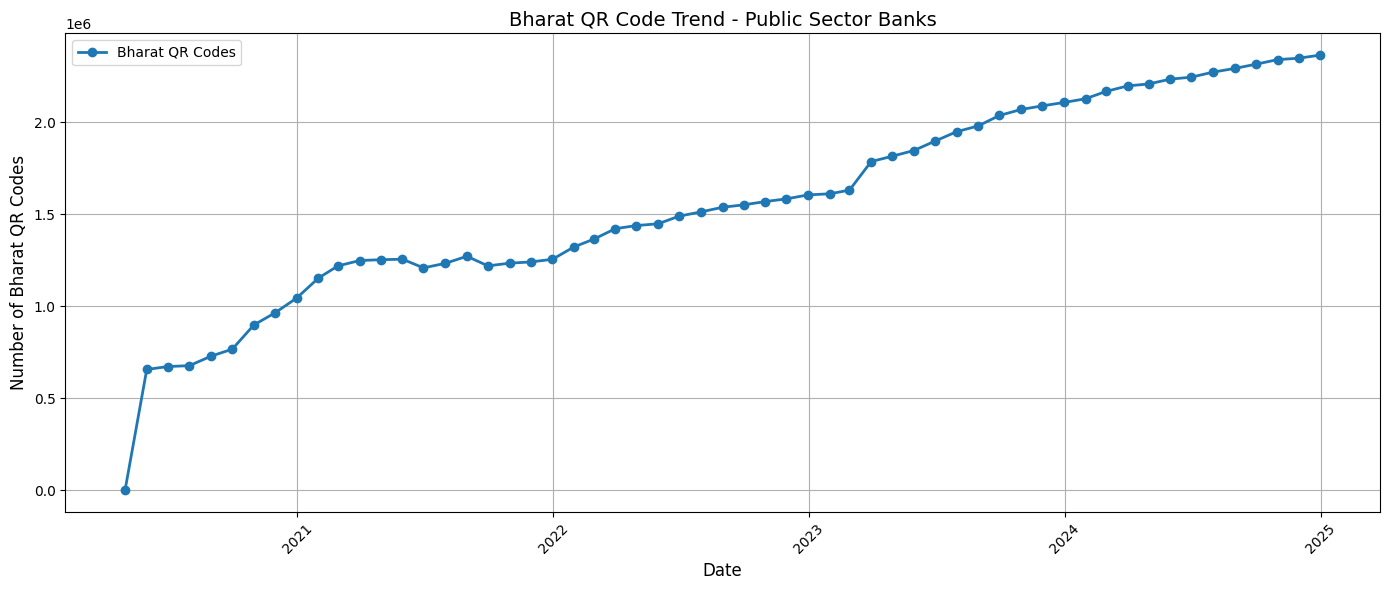

Private Sector Banks
  Monthly Avg Bharat QR Codes (since Apr 2020):  3102238.07



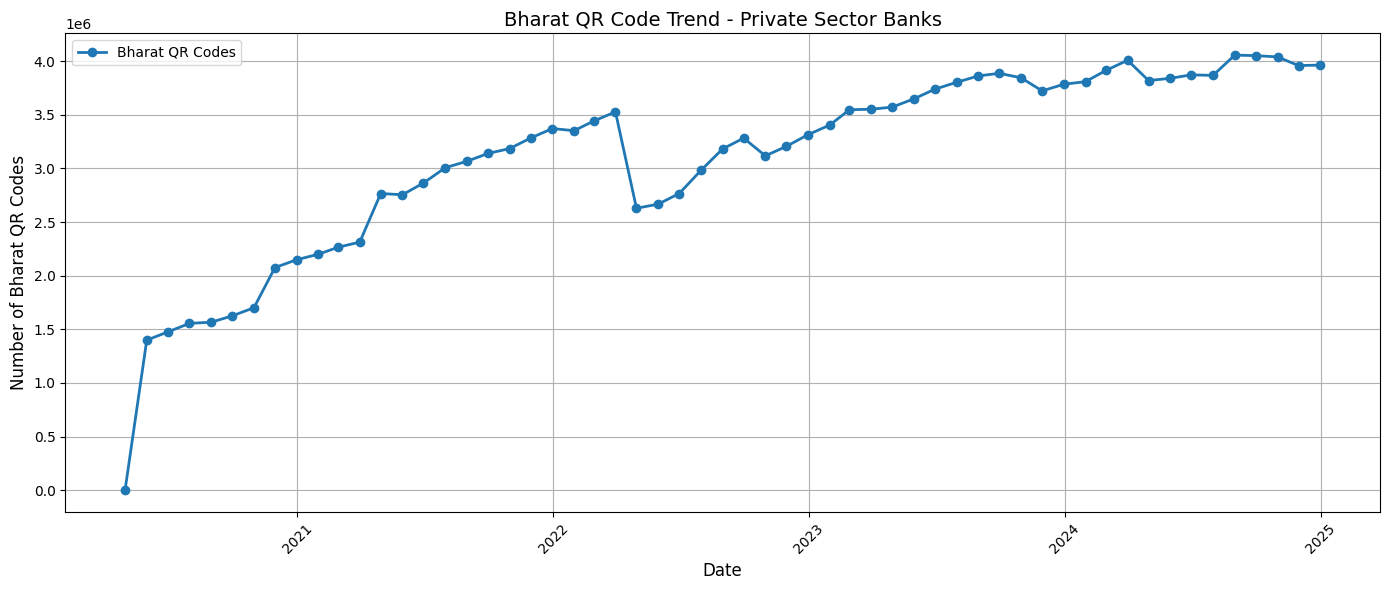

Foreign Banks
  Monthly Avg Bharat QR Codes (since Apr 2020):  128.33



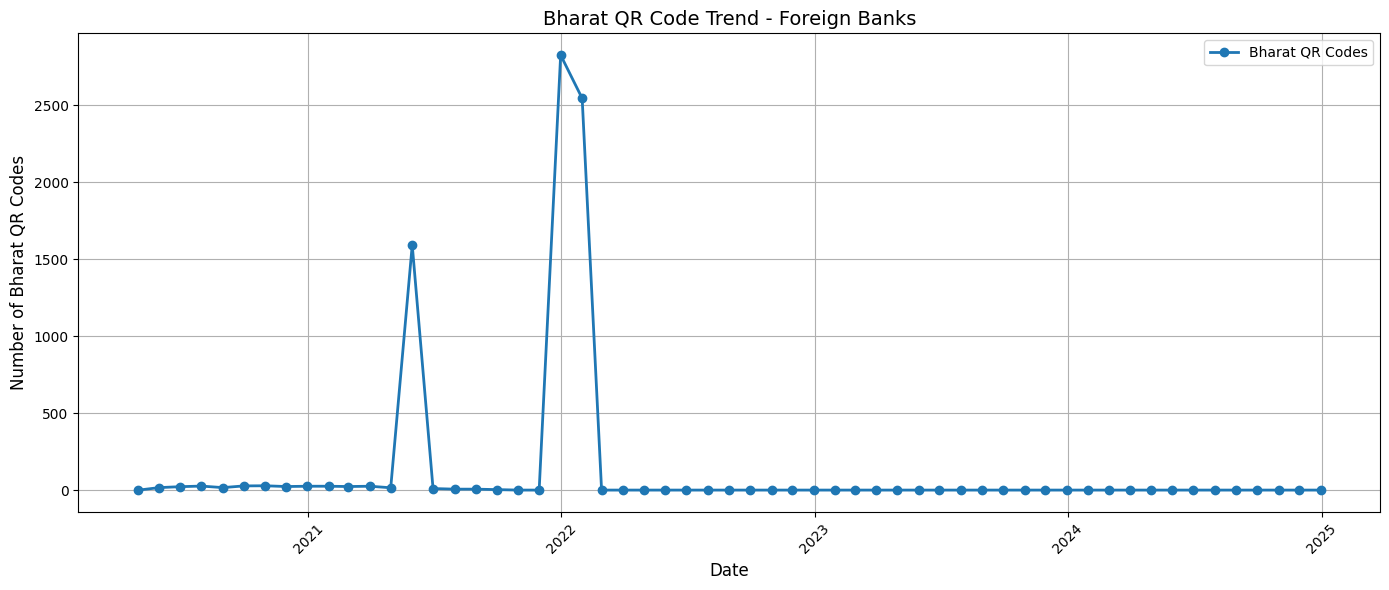

Payment Banks
  Monthly Avg Bharat QR Codes (since Apr 2020):  0.00



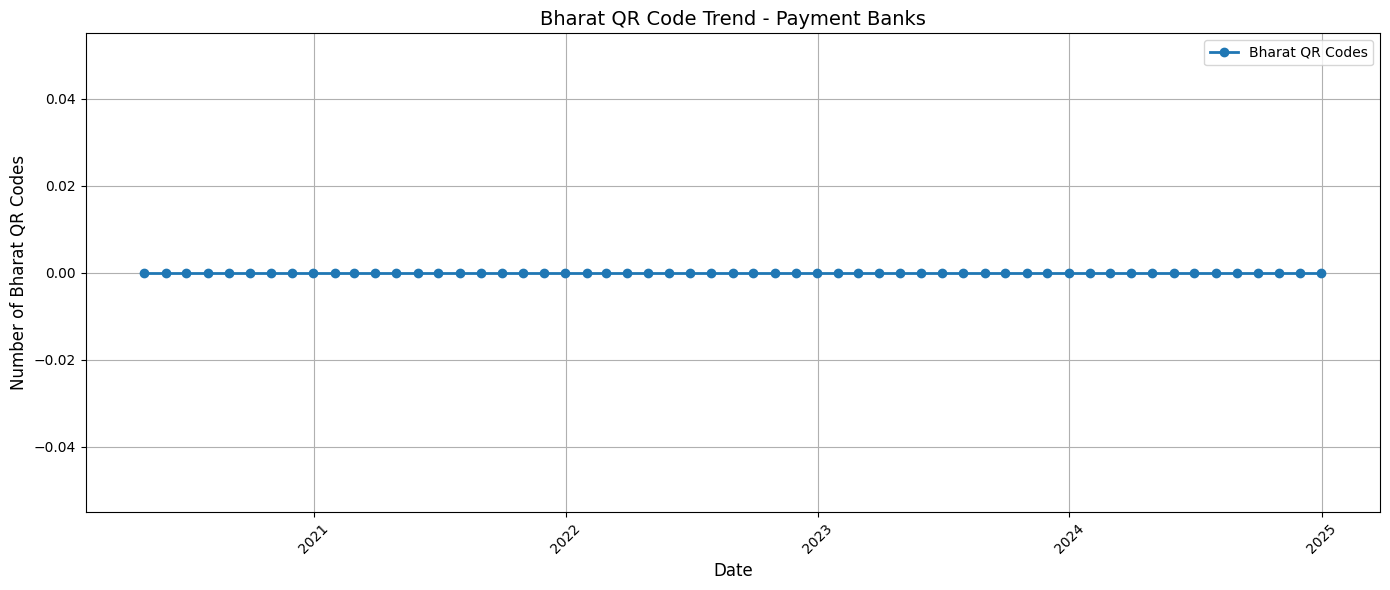

Small Finance Banks
  Monthly Avg Bharat QR Codes (since Apr 2020):  31128.05



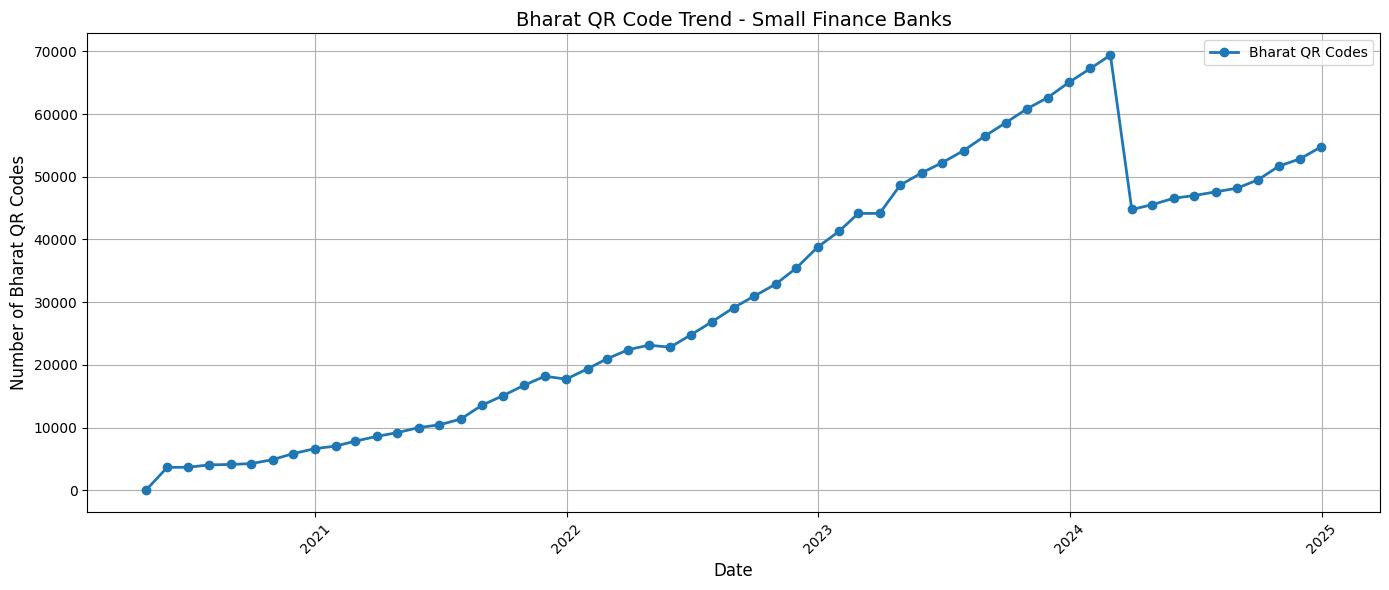

In [ ]:
# Bharat QR Code Analysis (from April 2020)
df_bharat = df[df['Date'] >= '2020-04-01']
num_months_bharat = df_bharat['Date'].nunique()
bank_types = df_bharat['Banktype'].unique()

for btype in bank_types:
    subset = df_bharat[df_bharat['Banktype'] == btype]
    bharat_trend = subset.groupby('Date')['Bharat QR Codes'].sum().reset_index()
    total_bharat = bharat_trend['Bharat QR Codes'].sum()
    avg_bharat = total_bharat / num_months_bharat

    print(f"{btype}")
    print(f"  Monthly Avg Bharat QR Codes (since Apr 2020):  {avg_bharat:.2f}\n")

    plt.figure(figsize=(14,6))
    plt.plot(bharat_trend['Date'], bharat_trend['Bharat QR Codes'], marker='o', linewidth=2, label='Bharat QR Codes')
    plt.title(f'Bharat QR Code Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Bharat QR Codes', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Public Sector Banks
  Monthly Avg UPI QR Codes (since Mar 2022):  13234118.79



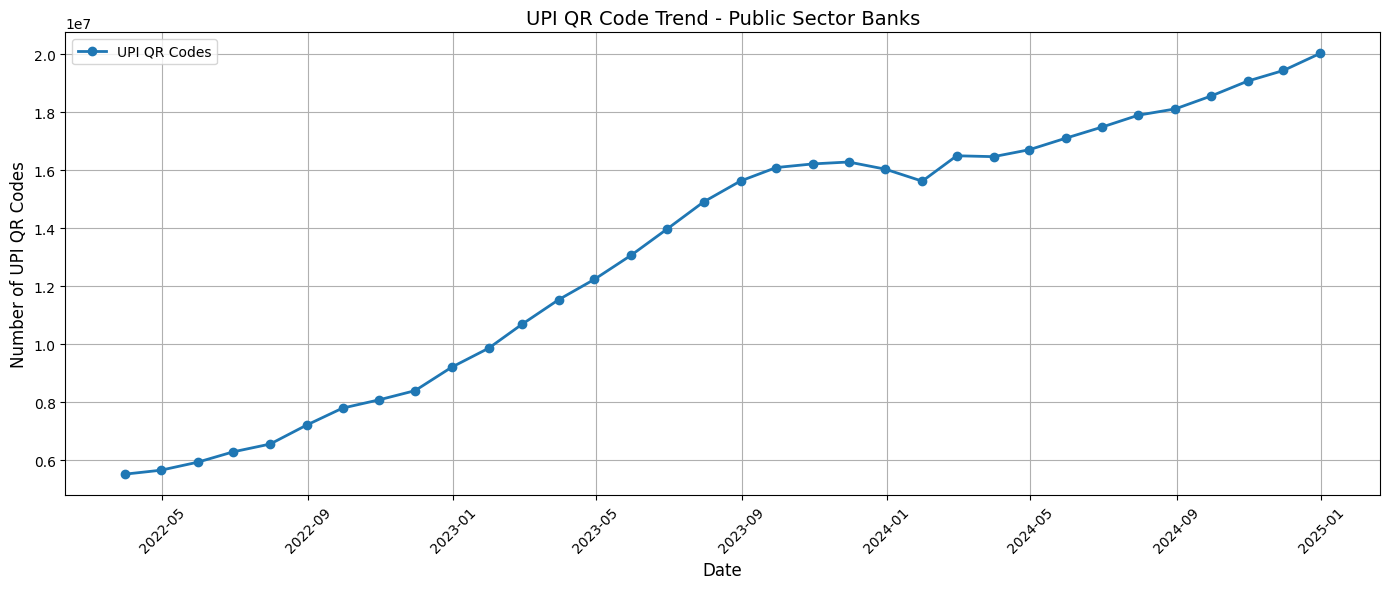

Private Sector Banks
  Monthly Avg UPI QR Codes (since Mar 2022):  305460367.44



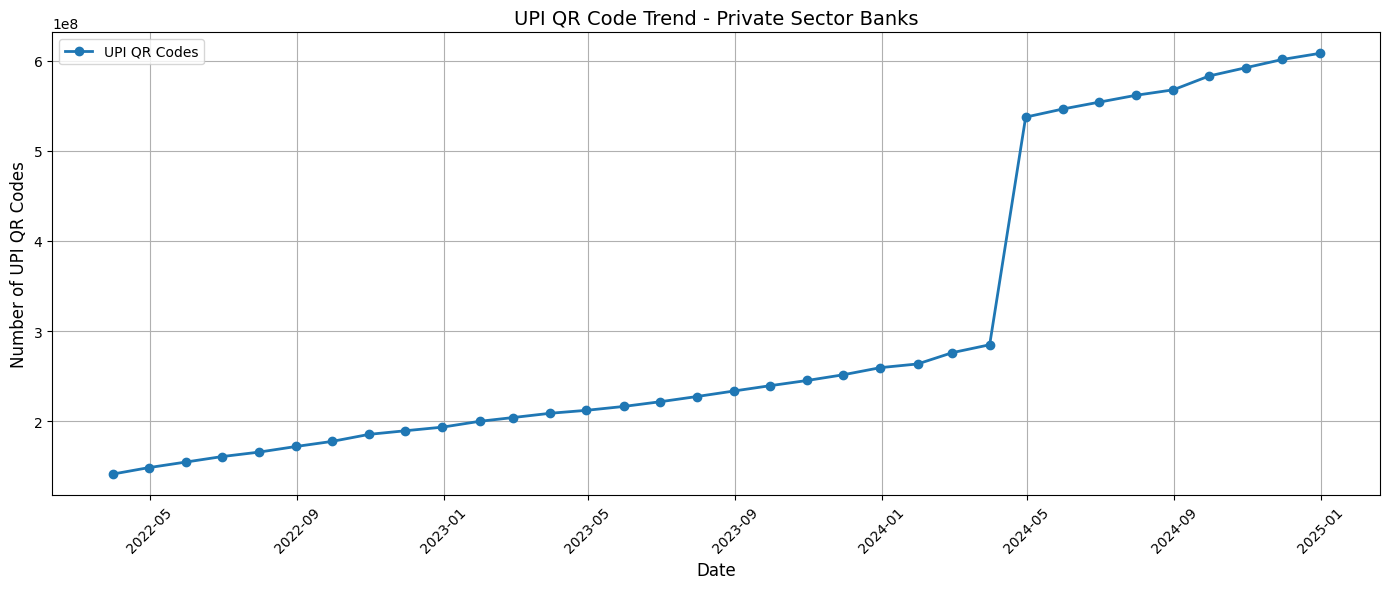

Foreign Banks
  Monthly Avg UPI QR Codes (since Mar 2022):  4552.85



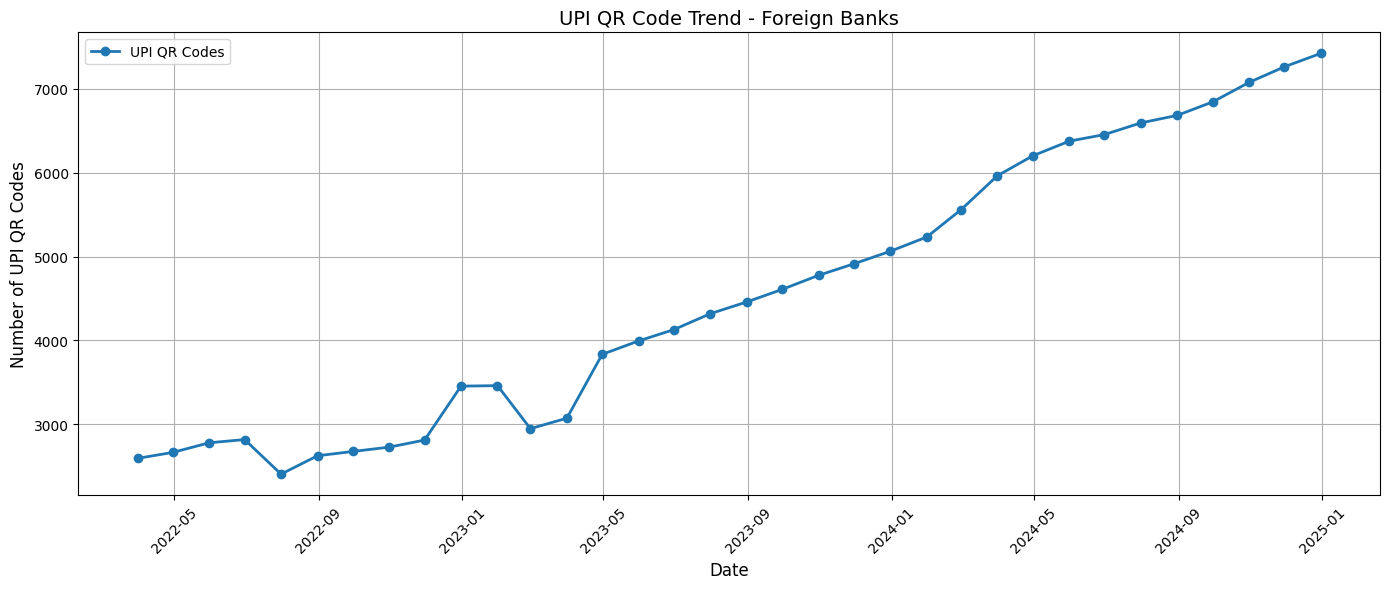

Payment Banks
  Monthly Avg UPI QR Codes (since Mar 2022):  25596049.71



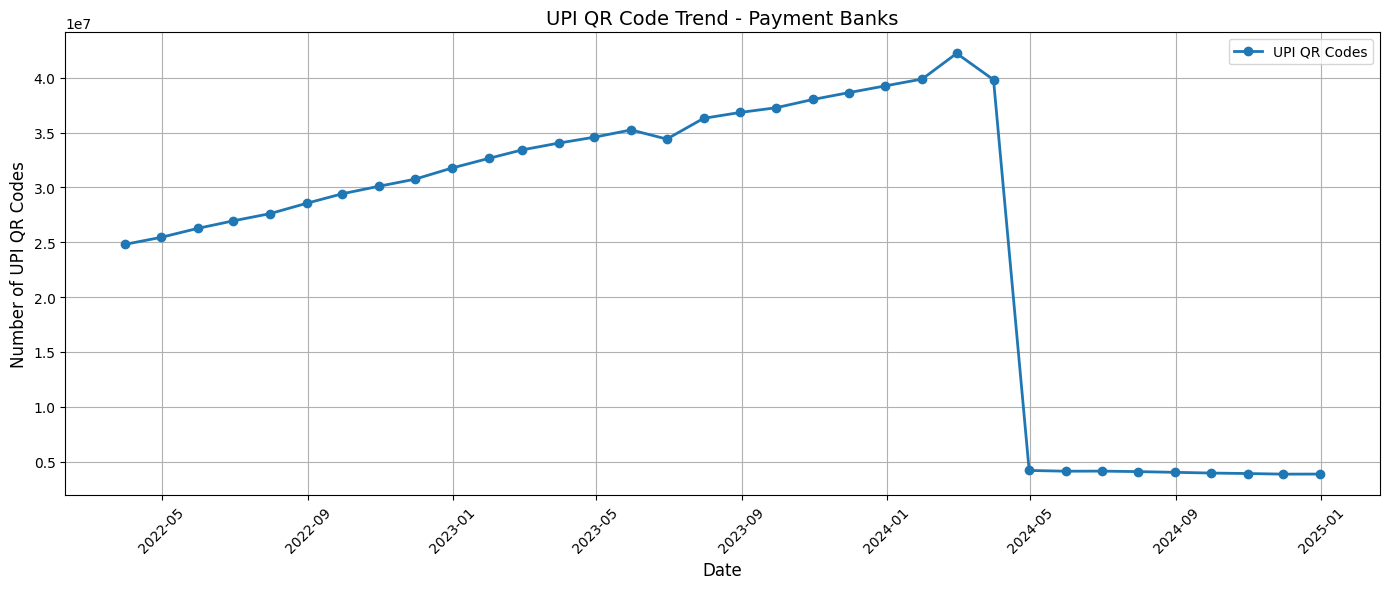

Small Finance Banks
  Monthly Avg UPI QR Codes (since Mar 2022):  1724447.82



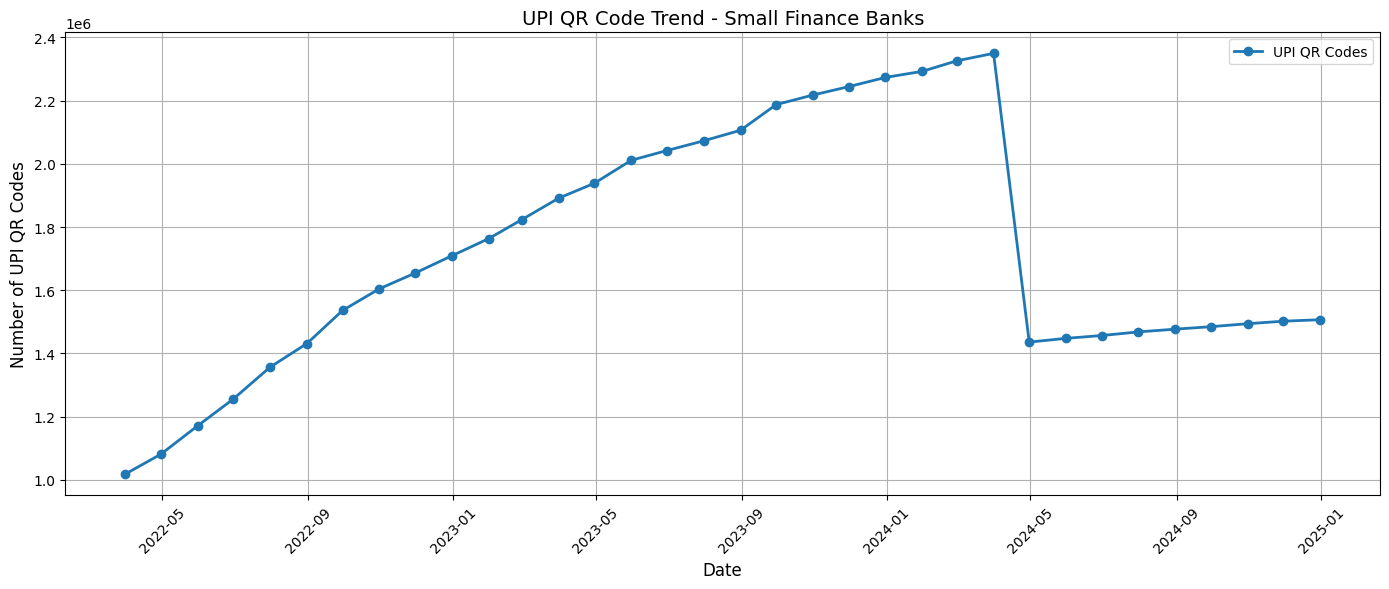

In [ ]:
# UPI QR Code Analysis (from March 2022)
df_upi = df[df['Date'] >= '2022-03-01']
num_months_upi = df_upi['Date'].nunique()
bank_types = df_upi['Banktype'].unique()

for btype in bank_types:
    subset = df_upi[df_upi['Banktype'] == btype]
    upi_trend = subset.groupby('Date')['UPI QR Codes'].sum().reset_index()
    total_upi = upi_trend['UPI QR Codes'].sum()
    avg_upi = total_upi / num_months_upi

    print(f"{btype}")
    print(f"  Monthly Avg UPI QR Codes (since Mar 2022):  {avg_upi:.2f}\n")

    plt.figure(figsize=(14,6))
    plt.plot(upi_trend['Date'], upi_trend['UPI QR Codes'], marker='o', linewidth=2, label='UPI QR Codes')
    plt.title(f'UPI QR Code Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of UPI QR Codes', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


##credit cards

Public Sector Banks
  Monthly Avg Credit Cards Issued:  13,739,236.75



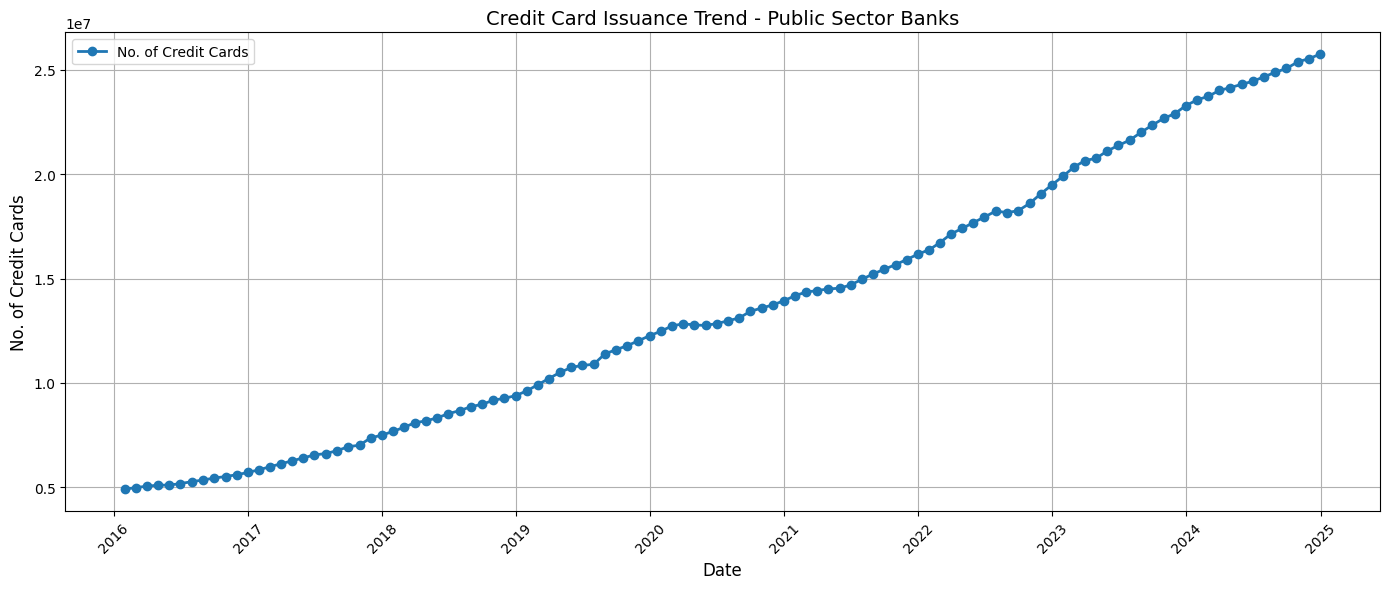

Private Sector Banks
  Monthly Avg Credit Cards Issued:  40,360,725.37



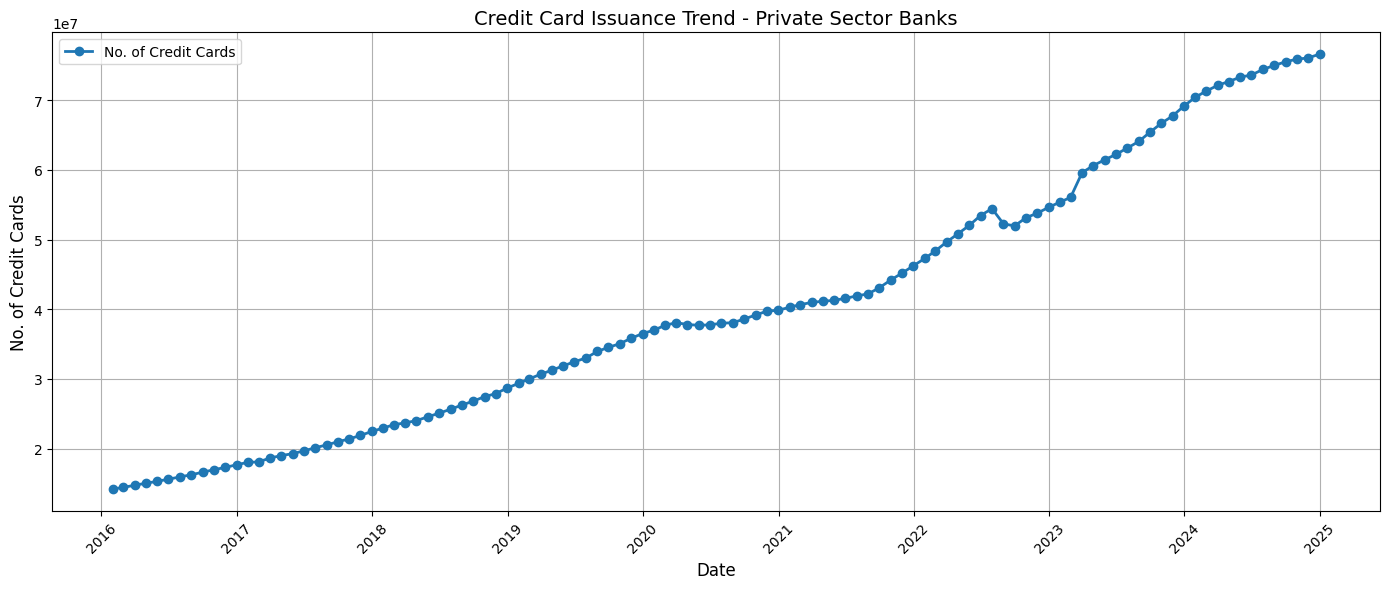

Foreign Banks
  Monthly Avg Credit Cards Issued:  5,780,069.07



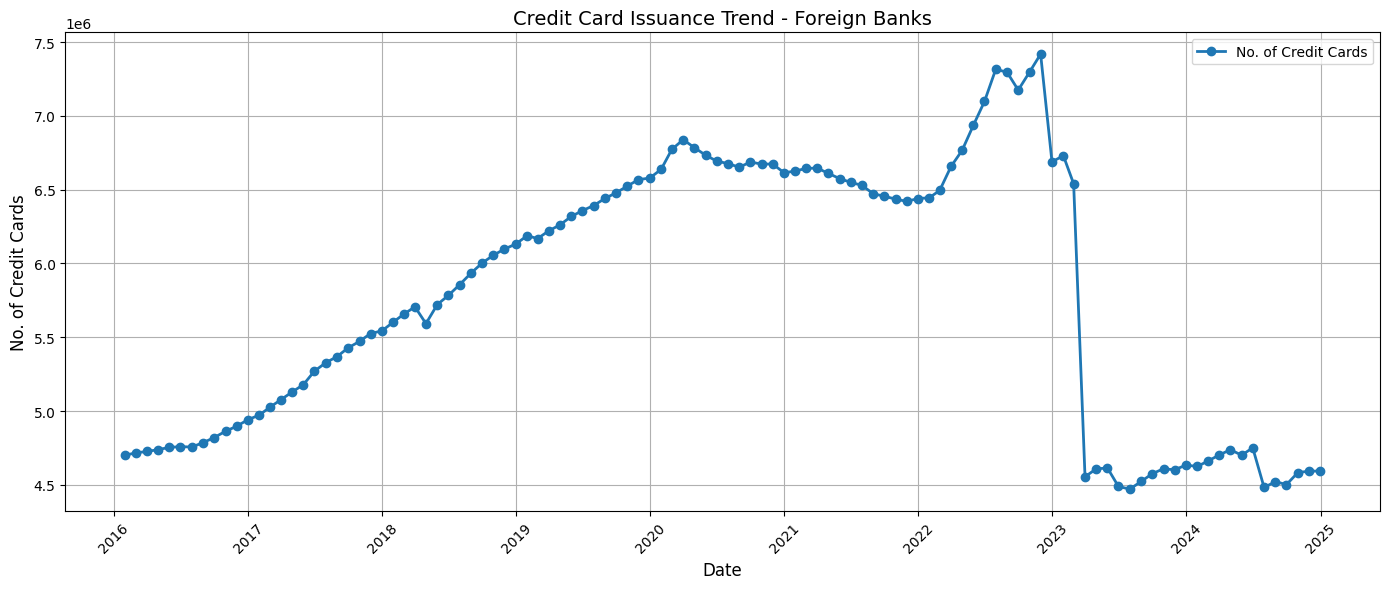

Payment Banks
  Monthly Avg Credit Cards Issued:  0.00



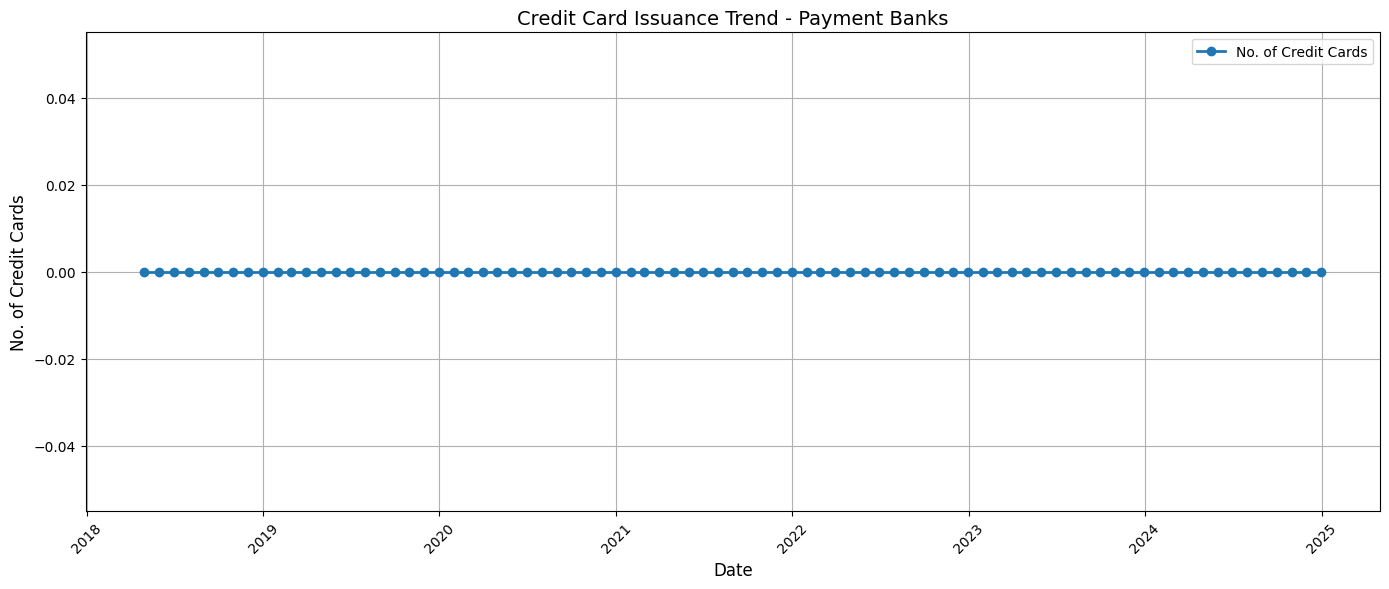

Small Finance Banks
  Monthly Avg Credit Cards Issued:  283,635.99



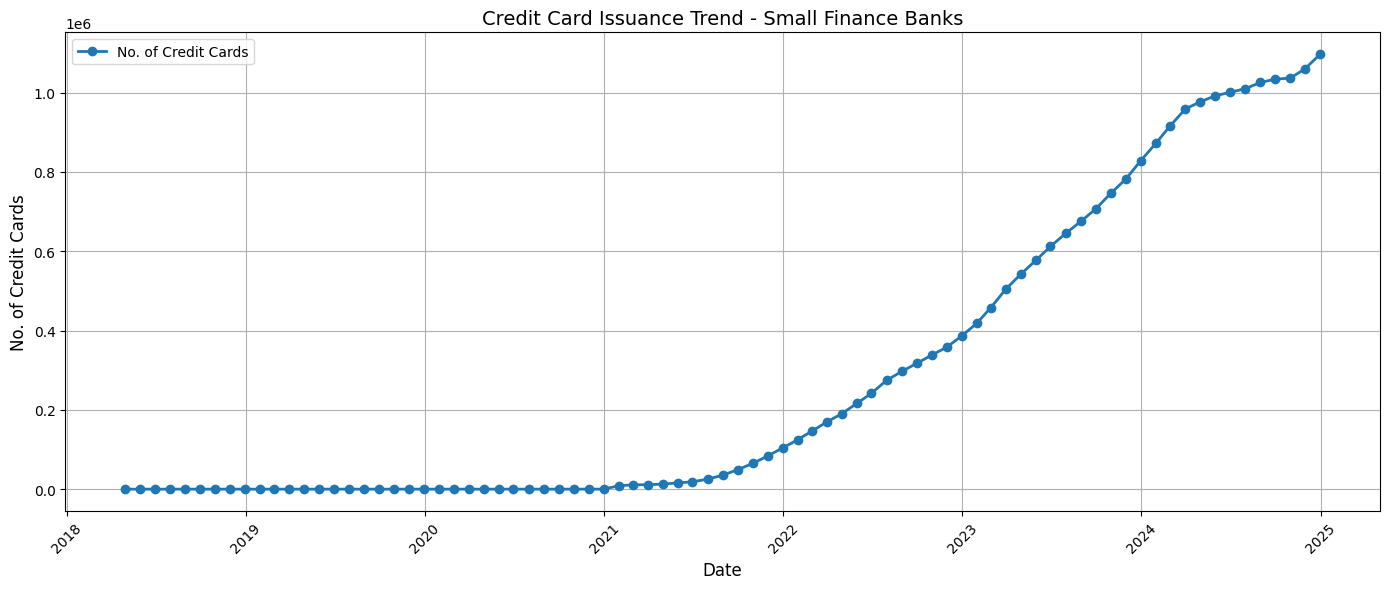

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'No. of Credit Card' column to numeric in case of string values
df['No. of Credit Card'] = pd.to_numeric(df['No. of Credit Card'], errors='coerce')

# Get list of unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type
for btype in bank_types:
    # Filter for current bank type
    subset = df[df['Banktype'] == btype]

    # Group by Date and sum total credit cards
    credit_trend = subset.groupby('Date')['No. of Credit Card'].sum().reset_index()

    # Calculate monthly average
    total_credit_cards = credit_trend['No. of Credit Card'].sum()
    num_months = credit_trend['Date'].nunique()
    avg_credit = total_credit_cards / num_months if num_months > 0 else 0

    # Print monthly average
    print(f"{btype}")
    print(f"  Monthly Avg Credit Cards Issued:  {avg_credit:,.2f}\n")

    # Plot
    plt.figure(figsize=(14,6))
    plt.plot(credit_trend['Date'], credit_trend['No. of Credit Card'],
             marker='o', linewidth=2, label='No. of Credit Cards')

    plt.title(f'Credit Card Issuance Trend - {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('No. of Credit Cards', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert credit card column to numeric
df['No. of Credit Card'] = pd.to_numeric(df['No. of Credit Card'], errors='coerce')

# Get unique bank types
bank_types = df['Banktype'].unique()

for btype in bank_types:
    print(f"\n🏦 {btype}")

    # Filter for current bank type
    subset = df[df['Banktype'] == btype]

    # Group by Bank Name and calculate average number of credit cards
    avg_cards = subset.groupby('Bank Name')['No. of Credit Card'].mean()

    # Filter out banks with 0 or NaN average
    non_zero_avg = avg_cards[avg_cards > 0].dropna()

    if not non_zero_avg.empty:
        max_bank = non_zero_avg.idxmax()
        min_bank = non_zero_avg.idxmin()

        print(f"  🔺 Highest Avg: {max_bank} – {non_zero_avg[max_bank]:,.0f} cards")
        print(f"  🔻 Lowest Avg: {min_bank} – {non_zero_avg[min_bank]:,.0f} cards")
    else:
        print("  ⚠️ No credit card data available for this bank type.")



🏦 Public Sector Banks
  🔺 Highest Avg: STATE BANK OF INDIA – 10,973,391 cards
  🔻 Lowest Avg: UNITED BANK OF INDIA – 3,413 cards

🏦 Private Sector Banks
  🔺 Highest Avg: HDFC BANK LTD – 14,218,013 cards
  🔻 Lowest Avg: BANDHAN BANK LTD – 1 cards

🏦 Foreign Banks
  🔺 Highest Avg: CITI BANK – 2,109,517 cards
  🔻 Lowest Avg: DBS BANK – 219 cards

🏦 Payment Banks
  ⚠️ No credit card data available for this bank type.

🏦 Small Finance Banks
  🔺 Highest Avg: AU SMALL FINANCE BANK LTD – 790,385 cards
  🔻 Lowest Avg: EQUITAS SMALL FINANCE BANK LTD – 0 cards


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant columns to numeric
df['No.of credit card transcations via ATM'] = pd.to_numeric(df['No.of credit card transcations via ATM'], errors='coerce')
df['No.of credit card transcations via POS'] = pd.to_numeric(df['No.of credit card transcations via POS'], errors='coerce')

# Unique bank types
bank_types = df['Banktype'].unique()

for btype in bank_types:
    print(f"\n🏦 {btype}")

    # Filter by bank type
    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate mean transactions
    avg_atm = subset.groupby('Bank Name')['No.of credit card transcations via ATM'].mean()
    avg_pos = subset.groupby('Bank Name')['No.of credit card transcations via POS'].mean()

    # Clean non-zero values
    avg_atm = avg_atm[avg_atm > 0].dropna()
    avg_pos = avg_pos[avg_pos > 0].dropna()

    if not avg_atm.empty:
        print(f"  💳 Credit Card Transactions via ATM:")
        print(f"    🔺 Highest Avg: {avg_atm.idxmax()} – {avg_atm.max():,.0f} txns")
        print(f"    🔻 Lowest Avg: {avg_atm.idxmin()} – {avg_atm.min():,.0f} txns")
    else:
        print("  ⚠️ No ATM credit card transaction data available.")

    if not avg_pos.empty:
        print(f"  🛒 Credit Card Transactions via POS:")
        print(f"    🔺 Highest Avg: {avg_pos.idxmax()} – {avg_pos.max():,.0f} txns")
        print(f"    🔻 Lowest Avg: {avg_pos.idxmin()} – {avg_pos.min():,.0f} txns")
    else:
        print("  ⚠️ No POS credit card transaction data available.")



🏦 Public Sector Banks
  💳 Credit Card Transactions via ATM:
    🔺 Highest Avg: STATE BANK OF INDIA – 106,531 txns
    🔻 Lowest Avg: UNITED BANK OF INDIA – 111 txns
  🛒 Credit Card Transactions via POS:
    🔺 Highest Avg: STATE BANK OF INDIA – 24,930,068 txns
    🔻 Lowest Avg: UNITED BANK OF INDIA – 4,518 txns

🏦 Private Sector Banks
  💳 Credit Card Transactions via ATM:
    🔺 Highest Avg: HDFC BANK LTD – 153,560 txns
    🔻 Lowest Avg: KARUR VYSYA BANK LTD – 70 txns
  🛒 Credit Card Transactions via POS:
    🔺 Highest Avg: HDFC BANK LTD – 41,307,508 txns
    🔻 Lowest Avg: BANDHAN BANK LTD – 1 txns

🏦 Foreign Banks
  💳 Credit Card Transactions via ATM:
    🔺 Highest Avg: SBM BANK INDIA – 61,210 txns
    🔻 Lowest Avg: DBS BANK – 0 txns
  🛒 Credit Card Transactions via POS:
    🔺 Highest Avg: CITI BANK – 11,583,669 txns
    🔻 Lowest Avg: DBS BANK – 251 txns

🏦 Payment Banks
  ⚠️ No ATM credit card transaction data available.
  ⚠️ No POS credit card transaction data available.

🏦 Small Fina

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant columns to numeric
df['Amount of credit card transactions via ATM(in millions)'] = pd.to_numeric(
    df['Amount of credit card transactions via ATM(in millions)'], errors='coerce')
df['Amount of credit card transactions via POS(in millions)'] = pd.to_numeric(
    df['Amount of credit card transactions via POS(in millions)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate mean values
    avg_amt_atm = subset.groupby('Bank Name')['Amount of credit card transactions via ATM(in millions)'].mean()
    avg_amt_pos = subset.groupby('Bank Name')['Amount of credit card transactions via POS(in millions)'].mean()

    # Filter out 0 or NaN values
    avg_amt_atm = avg_amt_atm[avg_amt_atm > 0].dropna()
    avg_amt_pos = avg_amt_pos[avg_amt_pos > 0].dropna()

    if not avg_amt_atm.empty:
        print(f"  💳 Credit Card ₹ Amount via ATM:")
        print(f"    🔺 Highest Avg: {avg_amt_atm.idxmax()} – ₹{avg_amt_atm.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_atm.idxmin()} – ₹{avg_amt_atm.min():,.2f} million/month")
    else:
        print("  ⚠️ No ATM transaction amount data available.")

    if not avg_amt_pos.empty:
        print(f"  🛒 Credit Card ₹ Amount via POS:")
        print(f"    🔺 Highest Avg: {avg_amt_pos.idxmax()} – ₹{avg_amt_pos.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_pos.idxmin()} – ₹{avg_amt_pos.min():,.2f} million/month")
    else:
        print("  ⚠️ No POS transaction amount data available.")



🏦 Public Sector Banks
  💳 Credit Card ₹ Amount via ATM:
    🔺 Highest Avg: STATE BANK OF INDIA – ₹315.15 million/month
    🔻 Lowest Avg: BANK OF MAHARASHTRA – ₹0.08 million/month
  🛒 Credit Card ₹ Amount via POS:
    🔺 Highest Avg: STATE BANK OF INDIA – ₹61,077.60 million/month
    🔻 Lowest Avg: UNITED BANK OF INDIA – ₹9.12 million/month

🏦 Private Sector Banks
  💳 Credit Card ₹ Amount via ATM:
    🔺 Highest Avg: HDFC BANK LTD – ₹657.97 million/month
    🔻 Lowest Avg: FEDERAL BANK LTD – ₹0.01 million/month
  🛒 Credit Card ₹ Amount via POS:
    🔺 Highest Avg: HDFC BANK LTD – ₹102,758.51 million/month
    🔻 Lowest Avg: BANDHAN BANK LTD – ₹0.00 million/month

🏦 Foreign Banks
  💳 Credit Card ₹ Amount via ATM:
    🔺 Highest Avg: CITI BANK – ₹162.80 million/month
    🔻 Lowest Avg: DBS BANK – ₹0.00 million/month
  🛒 Credit Card ₹ Amount via POS:
    🔺 Highest Avg: AMERICAN EXPRESS – ₹26,637.82 million/month
    🔻 Lowest Avg: DBS BANK – ₹0.69 million/month

🏦 Payment Banks
  ⚠️ No ATM transac

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the e-commerce transaction count column to numeric
df['No.of credit card transcations via online (e-com)'] = pd.to_numeric(
    df['No.of credit card transcations via online (e-com)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and compute average transaction count
    avg_ecom_txn = subset.groupby('Bank Name')['No.of credit card transcations via online (e-com)'].mean()

    # Filter non-zero values
    avg_ecom_txn = avg_ecom_txn[avg_ecom_txn > 0].dropna()

    if not avg_ecom_txn.empty:
        print(f"  🌐 No. of Credit Card Transactions via Online (E-commerce):")
        print(f"    🔺 Highest Avg: {avg_ecom_txn.idxmax()} – {avg_ecom_txn.max():,.0f} transactions/month")
        print(f"    🔻 Lowest Avg: {avg_ecom_txn.idxmin()} – {avg_ecom_txn.min():,.0f} transactions/month")
    else:
        print("  ⚠️ No e-commerce credit card transaction count data available.")



🏦 Public Sector Banks
  🌐 No. of Credit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: STATE BANK OF INDIA – 25,578,930 transactions/month
    🔻 Lowest Avg: BANK OF MAHARASHTRA – 17,497 transactions/month

🏦 Private Sector Banks
  🌐 No. of Credit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: ICICI BANK LTD – 36,345,488 transactions/month
    🔻 Lowest Avg: BANDHAN BANK LTD – 4 transactions/month

🏦 Foreign Banks
  🌐 No. of Credit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: AMERICAN EXPRESS BANKING CORPORATION – 3,553,192 transactions/month
    🔻 Lowest Avg: BANK OF AMERICA – 2,805 transactions/month

🏦 Payment Banks
  ⚠️ No e-commerce credit card transaction count data available.

🏦 Small Finance Banks
  🌐 No. of Credit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: AU SMALL FINANCE BANK LTD – 1,355,067 transactions/month
    🔻 Lowest Avg: SURYODAY SMALL FINANCE BANK LTD – 1 transactions/month


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant column to numeric
df['Amount of credit transcations via online(e-com)'] = pd.to_numeric(
    df['Amount of credit transcations via online(e-com)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate average e-com amount
    avg_amt_ecom = subset.groupby('Bank Name')['Amount of credit transcations via online(e-com)'].mean()

    # Remove zero or missing values
    avg_amt_ecom = avg_amt_ecom[avg_amt_ecom > 0].dropna()

    if not avg_amt_ecom.empty:
        print(f"  🌐 Credit Card ₹ Amount via Online (E-commerce):")
        print(f"    🔺 Highest Avg: {avg_amt_ecom.idxmax()} – ₹{avg_amt_ecom.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_ecom.idxmin()} – ₹{avg_amt_ecom.min():,.2f} million/month")
    else:
        print("  ⚠️ No e-commerce transaction amount data available.")



🏦 Public Sector Banks
  🌐 Credit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: STATE BANK OF INDIA – ₹160,596,874.46 million/month
    🔻 Lowest Avg: INDIAN OVERSEAS BANK – ₹74,435.78 million/month

🏦 Private Sector Banks
  🌐 Credit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: HDFC BANK LTD – ₹248,389,269.57 million/month
    🔻 Lowest Avg: BANDHAN BANK LTD – ₹2.71 million/month

🏦 Foreign Banks
  🌐 Credit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: AMERICAN EXPRESS BANKING CORPORATION – ₹30,903,156.47 million/month
    🔻 Lowest Avg: DBS BANK – ₹28,066.10 million/month

🏦 Payment Banks
  ⚠️ No e-commerce transaction amount data available.

🏦 Small Finance Banks
  🌐 Credit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: AU SMALL FINANCE BANK LTD – ₹9,105,960.36 million/month
    🔻 Lowest Avg: SURYODAY SMALL FINANCE BANK LTD – ₹0.24 million/month


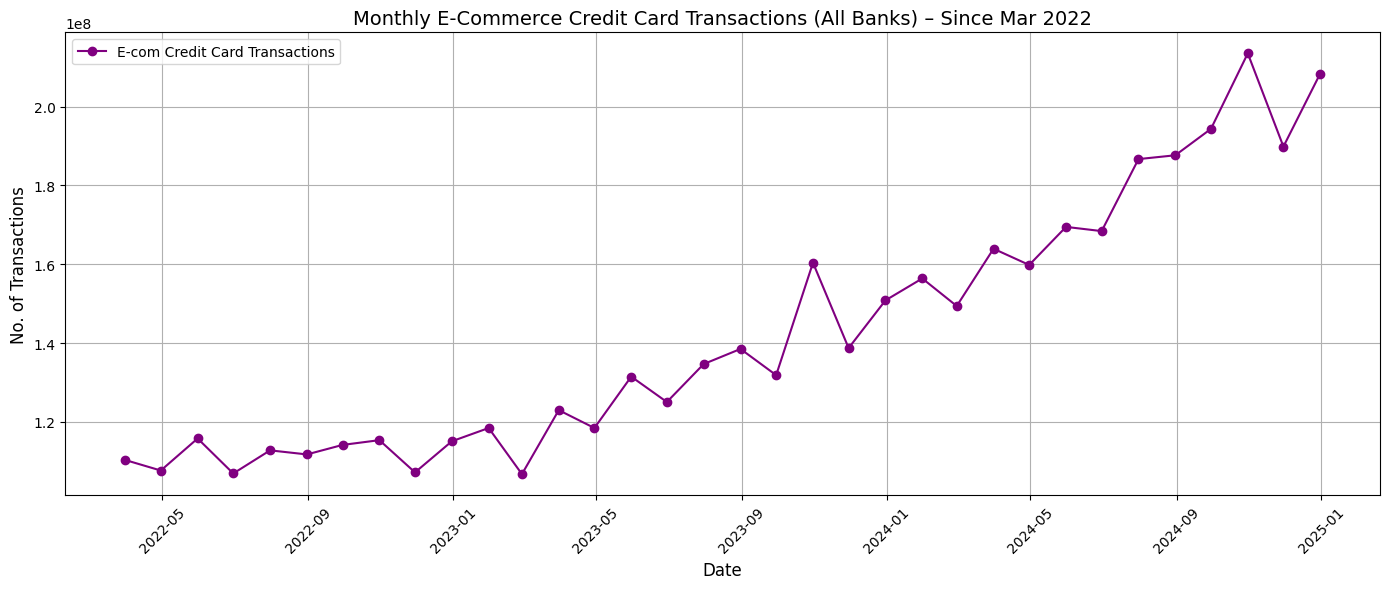

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert e-commerce transaction count to numeric
df['No.of credit card transcations via online (e-com)'] = pd.to_numeric(
    df['No.of credit card transcations via online (e-com)'], errors='coerce')

# Filter from March 2022 onward
df_filtered = df[df['Date'] >= '2022-03-01']

# Group by month and sum total transactions
ecom_trend = df_filtered.groupby('Date')['No.of credit card transcations via online (e-com)'].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(ecom_trend['Date'], ecom_trend['No.of credit card transcations via online (e-com)'],
         marker='o', linestyle='-', color='purple', label='E-com Credit Card Transactions')

plt.title('Monthly E-Commerce Credit Card Transactions (All Banks) – Since Mar 2022', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


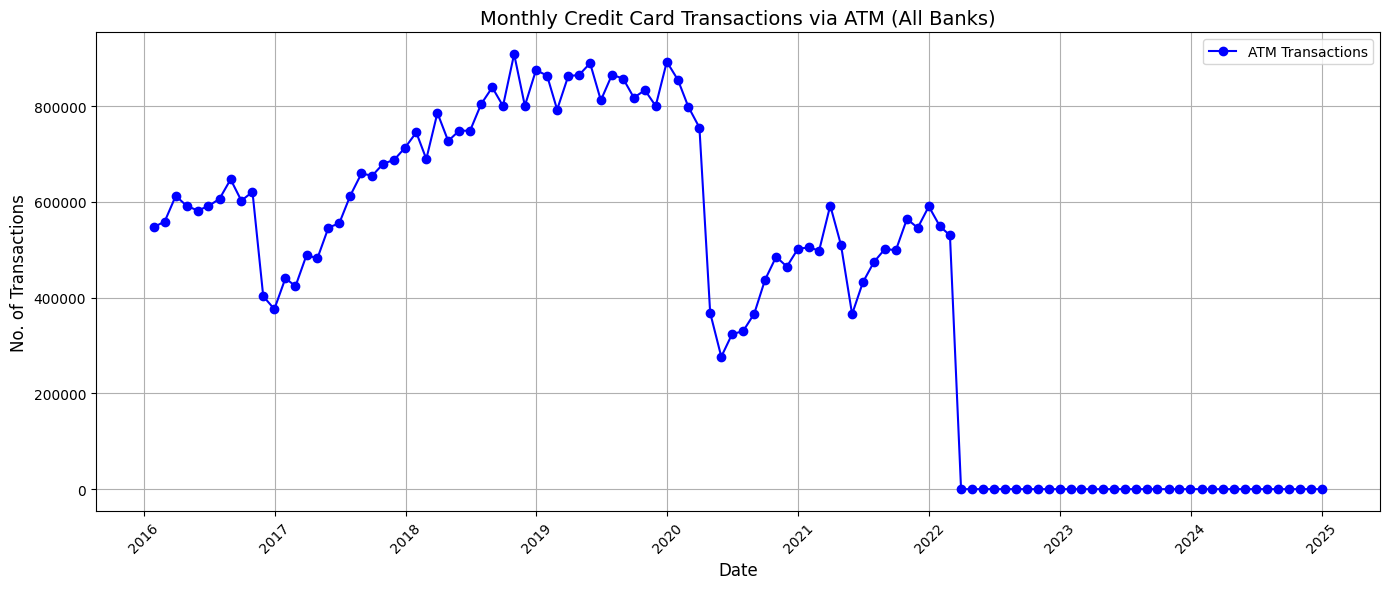

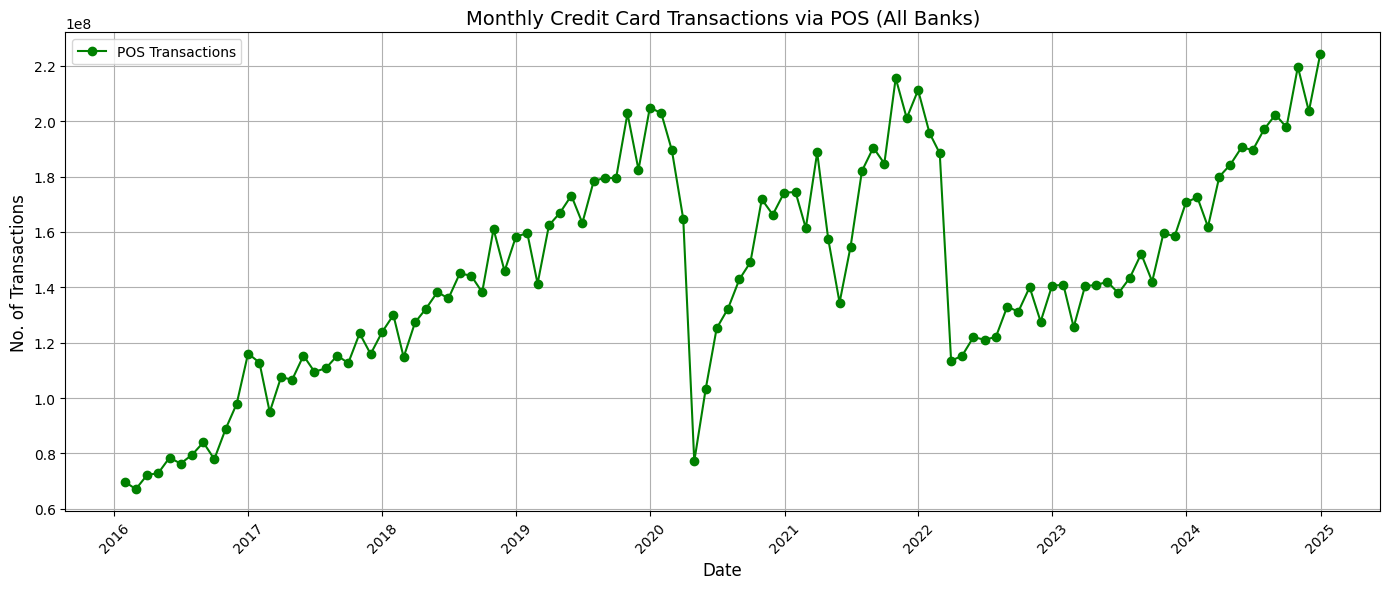

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert columns to numeric
df['No.of credit card transcations via ATM'] = pd.to_numeric(
    df['No.of credit card transcations via ATM'], errors='coerce')

df['No.of credit card transcations via POS'] = pd.to_numeric(
    df['No.of credit card transcations via POS'], errors='coerce')

# Group by month and sum across all banks
atm_trend = df.groupby('Date')['No.of credit card transcations via ATM'].sum().reset_index()
pos_trend = df.groupby('Date')['No.of credit card transcations via POS'].sum().reset_index()

# Plot ATM Transactions
plt.figure(figsize=(14,6))
plt.plot(atm_trend['Date'], atm_trend['No.of credit card transcations via ATM'],
         marker='o', color='blue', label='ATM Transactions')
plt.title('Monthly Credit Card Transactions via ATM (All Banks)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot POS Transactions
plt.figure(figsize=(14,6))
plt.plot(pos_trend['Date'], pos_trend['No.of credit card transcations via POS'],
         marker='o', color='green', label='POS Transactions')
plt.title('Monthly Credit Card Transactions via POS (All Banks)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## debit card

Public Sector Banks
  Monthly Avg Debit Cards Issued: 634,589,249.34



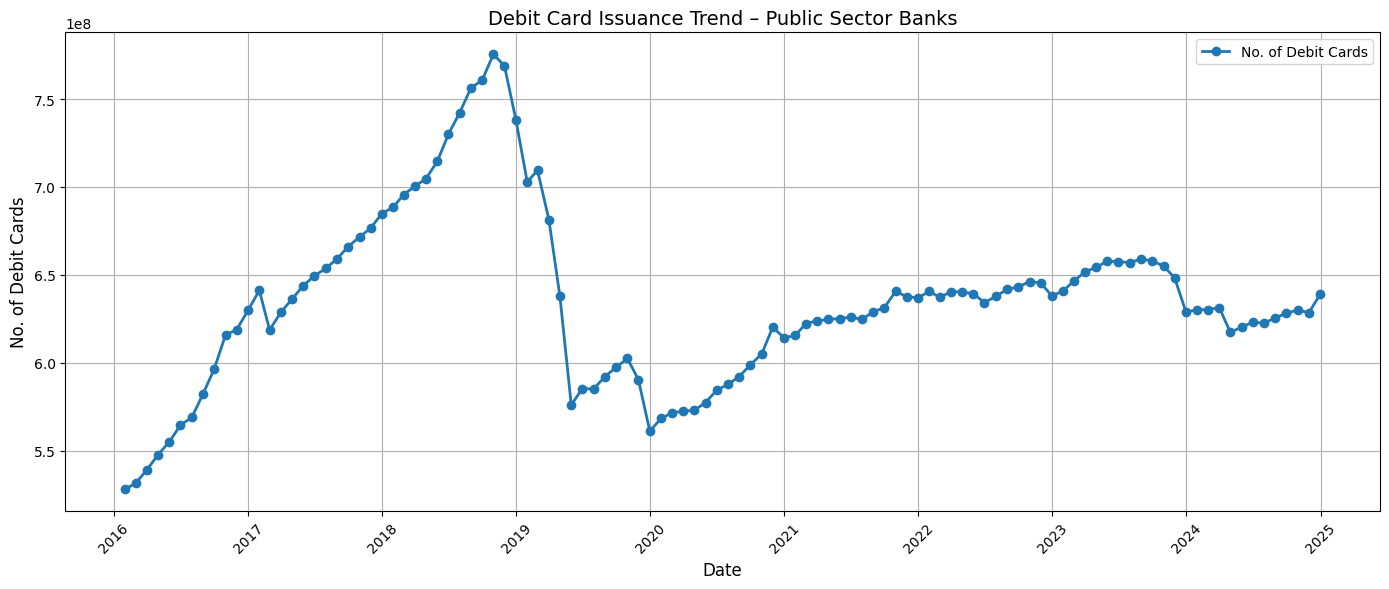

Private Sector Banks
  Monthly Avg Debit Cards Issued: 180,948,818.19



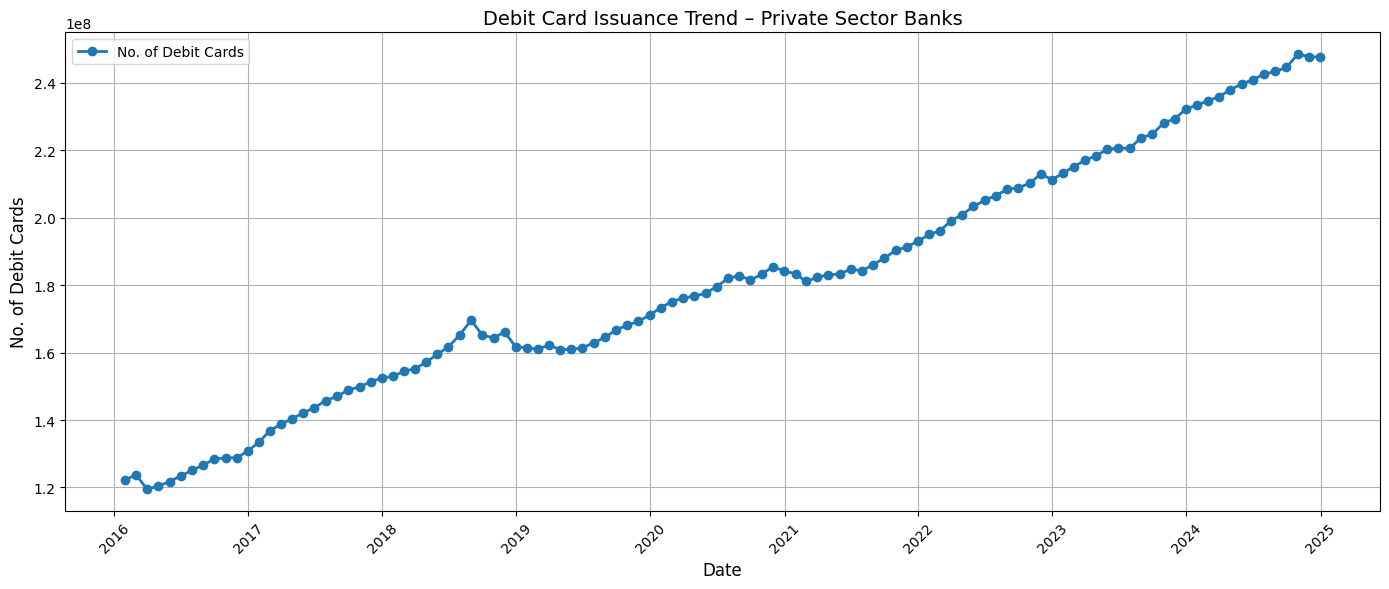

Foreign Banks
  Monthly Avg Debit Cards Issued: 4,794,426.12



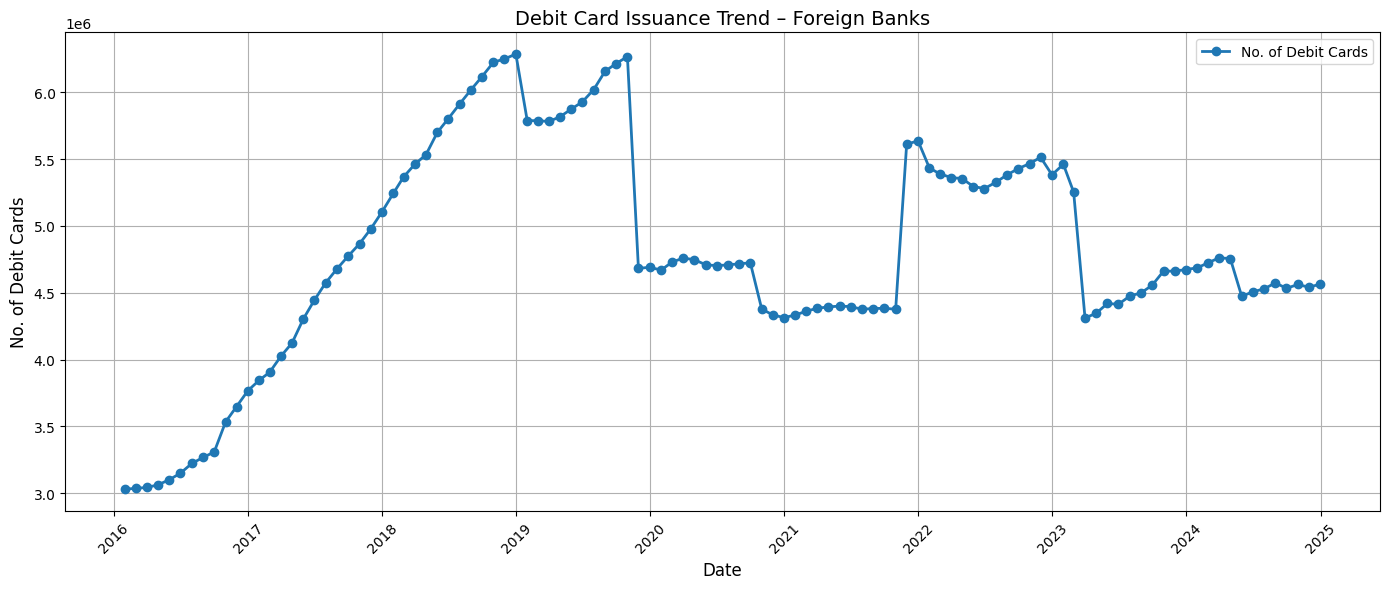

Payment Banks
  Monthly Avg Debit Cards Issued: 58,556,098.02



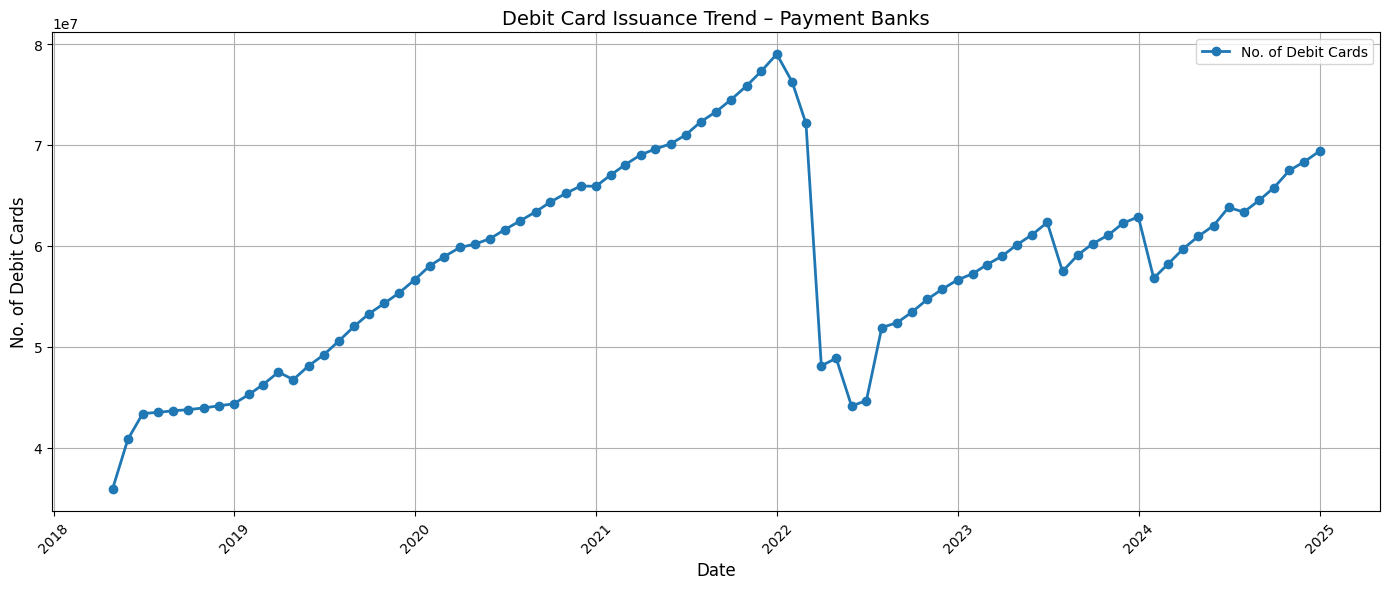

Small Finance Banks
  Monthly Avg Debit Cards Issued: 20,303,480.19



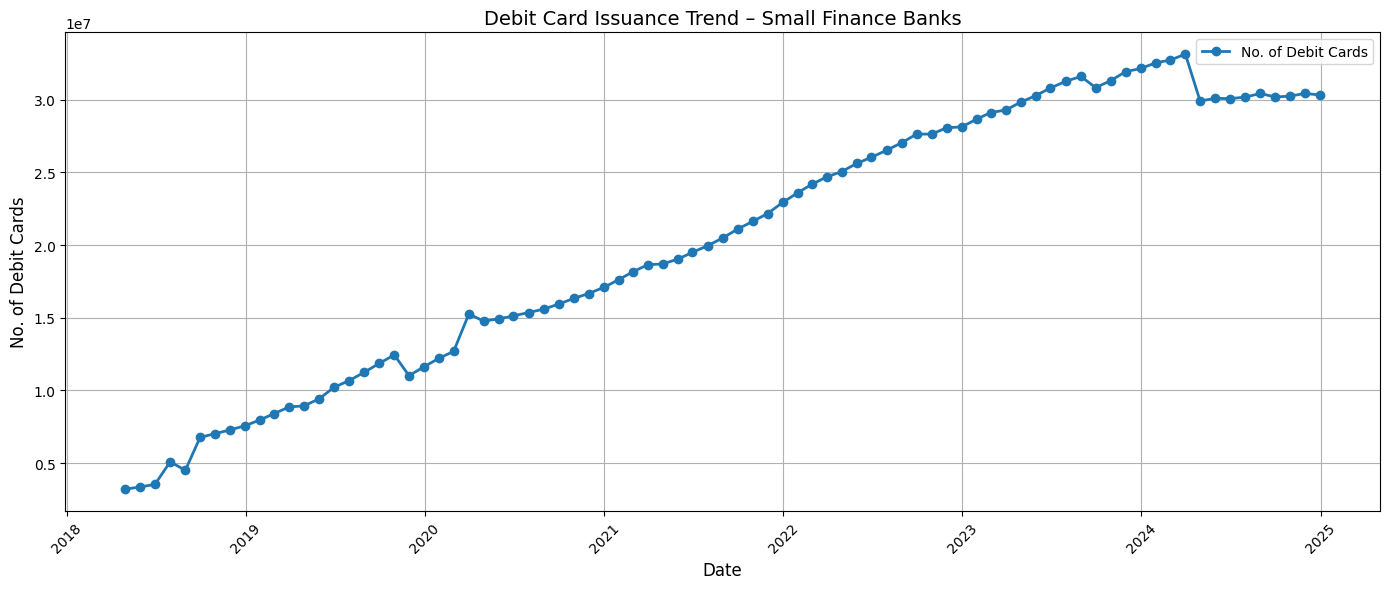

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert to numeric
df['No. of Debit Card'] = pd.to_numeric(df['No. of Debit Card'], errors='coerce')

# Unique bank types
bank_types = df['Banktype'].unique()

# Loop through each bank type
for btype in bank_types:
    subset = df[df['Banktype'] == btype]

    # Group by Date and sum debit cards issued
    debit_trend = subset.groupby('Date')['No. of Debit Card'].sum().reset_index()

    # Calculate monthly average
    total_debit = debit_trend['No. of Debit Card'].sum()
    num_months = debit_trend['Date'].nunique()
    avg_debit = total_debit / num_months if num_months > 0 else 0

    # Print monthly avg
    print(f"{btype}")
    print(f"  Monthly Avg Debit Cards Issued: {avg_debit:,.2f}\n")

    # Plot
    plt.figure(figsize=(14,6))
    plt.plot(debit_trend['Date'], debit_trend['No. of Debit Card'],
             marker='o', linewidth=2, label='No. of Debit Cards')

    plt.title(f'Debit Card Issuance Trend – {btype}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('No. of Debit Cards', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert debit card column to numeric
df['No. of Debit Card'] = pd.to_numeric(df['No. of Debit Card'], errors='coerce')

# Get unique bank types
bank_types = df['Banktype'].unique()

for btype in bank_types:
    print(f"\n🏦 {btype}")

    # Filter for current bank type
    subset = df[df['Banktype'] == btype]

    # Group by Bank Name and calculate average number of debit cards
    avg_cards = subset.groupby('Bank Name')['No. of Debit Card'].mean()

    # Filter out banks with 0 or NaN average
    non_zero_avg = avg_cards[avg_cards > 0].dropna()

    if not non_zero_avg.empty:
        max_bank = non_zero_avg.idxmax()
        min_bank = non_zero_avg.idxmin()

        print(f"  🔺 Highest Avg: {max_bank} – {non_zero_avg[max_bank]:,.0f} cards")
        print(f"  🔻 Lowest Avg: {min_bank} – {non_zero_avg[min_bank]:,.0f} cards")
    else:
        print("  ⚠️ No debit card data available for this bank type.")



🏦 Public Sector Banks
  🔺 Highest Avg: STATE BANK OF INDIA – 267,410,677 cards
  🔻 Lowest Avg: PUNJAB AND SIND BANK – 3,087,224 cards

🏦 Private Sector Banks
  🔺 Highest Avg: ICICI BANK LTD – 38,413,202 cards
  🔻 Lowest Avg: NAINITAL BANK LTD – 235,907 cards

🏦 Foreign Banks
  🔺 Highest Avg: DBS INDIA BANK LTD – 1,900,608 cards
  🔻 Lowest Avg: KOOKMIN BANK – 391 cards

🏦 Payment Banks
  🔺 Highest Avg: PAYTM PAYMENTS BANK – 46,495,922 cards
  🔻 Lowest Avg: Aditya Birla Idea Payments Bank – 1,335 cards

🏦 Small Finance Banks
  🔺 Highest Avg: UJJIVAN SMALL FINANCE BANK LTD – 8,579,039 cards
  🔻 Lowest Avg: Jana Small Finance Bank Limited – 505 cards


In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant columns to numeric
df['No.of debit transcations via ATM'] = pd.to_numeric(df['No.of debit transcations via ATM'], errors='coerce')
df['No.of debit transcations via POS'] = pd.to_numeric(df['No.of debit transcations via POS'], errors='coerce')

# Unique bank types
bank_types = df['Banktype'].unique()

for btype in bank_types:
    print(f"\n🏦 {btype}")

    # Filter by bank type
    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate mean transactions
    avg_atm = subset.groupby('Bank Name')['No.of debit transcations via ATM'].mean()
    avg_pos = subset.groupby('Bank Name')['No.of debit transcations via POS'].mean()

    # Clean non-zero values
    avg_atm = avg_atm[avg_atm > 0].dropna()
    avg_pos = avg_pos[avg_pos > 0].dropna()

    if not avg_atm.empty:
        print(f"  💳 Debit Card Transactions via ATM:")
        print(f"    🔺 Highest Avg: {avg_atm.idxmax()} – {avg_atm.max():,.0f} txns")
        print(f"    🔻 Lowest Avg: {avg_atm.idxmin()} – {avg_atm.min():,.0f} txns")
    else:
        print("  ⚠️ No ATM debit card transaction data available.")

    if not avg_pos.empty:
        print(f"  🛒 Debit Card Transactions via POS:")
        print(f"    🔺 Highest Avg: {avg_pos.idxmax()} – {avg_pos.max():,.0f} txns")
        print(f"    🔻 Lowest Avg: {avg_pos.idxmin()} – {avg_pos.min():,.0f} txns")
    else:
        print("  ⚠️ No POS debit card transaction data available.")



🏦 Public Sector Banks
  💳 Debit Card Transactions via ATM:
    🔺 Highest Avg: STATE BANK OF INDIA – 284,917,360 txns
    🔻 Lowest Avg: PUNJAB AND SIND BANK – 1,292,898 txns
  🛒 Debit Card Transactions via POS:
    🔺 Highest Avg: STATE BANK OF INDIA – 75,332,720 txns
    🔻 Lowest Avg: PUNJAB AND SIND BANK – 520,812 txns

🏦 Private Sector Banks
  💳 Debit Card Transactions via ATM:
    🔺 Highest Avg: HDFC BANK LTD – 34,382,204 txns
    🔻 Lowest Avg: IDFC BANK LTD – 340,853 txns
  🛒 Debit Card Transactions via POS:
    🔺 Highest Avg: HDFC BANK LTD – 31,737,798 txns
    🔻 Lowest Avg: NAINITAL BANK LTD – 21,124 txns

🏦 Foreign Banks
  💳 Debit Card Transactions via ATM:
    🔺 Highest Avg: CITI BANK – 1,889,627 txns
    🔻 Lowest Avg: BARCLAYS BANK PLC – 173 txns
  🛒 Debit Card Transactions via POS:
    🔺 Highest Avg: CITI BANK – 2,845,594 txns
    🔻 Lowest Avg: BARCLAYS BANK PLC – 138 txns

🏦 Payment Banks
  💳 Debit Card Transactions via ATM:
    🔺 Highest Avg: PAYTM PAYMENTS BANK – 1,629,130

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant columns to numeric
df['Amount of debit card transactions via ATM(in millions)'] = pd.to_numeric(
    df['Amount of debit card transactions via ATM(in millions)'], errors='coerce')
df['Amount of debit card transactions via POS(in millions)'] = pd.to_numeric(
    df['Amount of debit card transactions via POS(in millions)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate mean values
    avg_amt_atm = subset.groupby('Bank Name')['Amount of debit card transactions via ATM(in millions)'].mean()
    avg_amt_pos = subset.groupby('Bank Name')['Amount of debit card transactions via POS(in millions)'].mean()

    # Filter out 0 or NaN values
    avg_amt_atm = avg_amt_atm[avg_amt_atm > 0].dropna()
    avg_amt_pos = avg_amt_pos[avg_amt_pos > 0].dropna()

    if not avg_amt_atm.empty:
        print(f"  💳 Debit Card ₹ Amount via ATM:")
        print(f"    🔺 Highest Avg: {avg_amt_atm.idxmax()} – ₹{avg_amt_atm.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_atm.idxmin()} – ₹{avg_amt_atm.min():,.2f} million/month")
    else:
        print("  ⚠️ No ATM transaction amount data available.")

    if not avg_amt_pos.empty:
        print(f"  🛒 Debit Card ₹ Amount via POS:")
        print(f"    🔺 Highest Avg: {avg_amt_pos.idxmax()} – ₹{avg_amt_pos.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_pos.idxmin()} – ₹{avg_amt_pos.min():,.2f} million/month")
    else:
        print("  ⚠️ No POS transaction amount data available.")



🏦 Public Sector Banks
  💳 Debit Card ₹ Amount via ATM:
    🔺 Highest Avg: STATE BANK OF INDIA – ₹627,427.30 million/month
    🔻 Lowest Avg: PUNJAB AND SIND BANK – ₹3,185.10 million/month
  🛒 Debit Card ₹ Amount via POS:
    🔺 Highest Avg: STATE BANK OF INDIA – ₹86,395.14 million/month
    🔻 Lowest Avg: PUNJAB AND SIND BANK – ₹622.66 million/month

🏦 Private Sector Banks
  💳 Debit Card ₹ Amount via ATM:
    🔺 Highest Avg: HDFC BANK LTD – ₹116,519.96 million/month
    🔻 Lowest Avg: CSB BANK LIMITED – ₹24.40 million/month
  🛒 Debit Card ₹ Amount via POS:
    🔺 Highest Avg: HDFC BANK LTD – ₹40,841.04 million/month
    🔻 Lowest Avg: CSB BANK LIMITED – ₹5.75 million/month

🏦 Foreign Banks
  💳 Debit Card ₹ Amount via ATM:
    🔺 Highest Avg: CITI BANK – ₹6,078.10 million/month
    🔻 Lowest Avg: SBM Bank India – ₹0.17 million/month
  🛒 Debit Card ₹ Amount via POS:
    🔺 Highest Avg: CITI BANK – ₹4,185.42 million/month
    🔻 Lowest Avg: SBM BANK INDIA – ₹0.25 million/month

🏦 Payment Banks
  💳 

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the e-commerce transaction count column to numeric
df['No.of debit transcations via Online(e-com)'] = pd.to_numeric(
    df['No.of debit transcations via Online(e-com)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and compute average transaction count
    avg_ecom_txn = subset.groupby('Bank Name')['No.of debit transcations via Online(e-com)'].mean()

    # Filter non-zero values
    avg_ecom_txn = avg_ecom_txn[avg_ecom_txn > 0].dropna()

    if not avg_ecom_txn.empty:
        print(f"  🌐 No. of Debit Card Transactions via Online (E-commerce):")
        print(f"    🔺 Highest Avg: {avg_ecom_txn.idxmax()} – {avg_ecom_txn.max():,.0f} transactions/month")
        print(f"    🔻 Lowest Avg: {avg_ecom_txn.idxmin()} – {avg_ecom_txn.min():,.0f} transactions/month")
    else:
        print("  ⚠️ No e-commerce debit card transaction count data available.")



🏦 Public Sector Banks
  🌐 No. of Debit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: STATE BANK OF INDIA – 16,513,810 transactions/month
    🔻 Lowest Avg: PUNJAB AND SIND BANK – 177,268 transactions/month

🏦 Private Sector Banks
  🌐 No. of Debit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: HDFC BANK LTD – 11,547,553 transactions/month
    🔻 Lowest Avg: DHANALAXMI BANK LTD – 5,898 transactions/month

🏦 Foreign Banks
  🌐 No. of Debit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: DBS BANK – 323,910 transactions/month
    🔻 Lowest Avg: BARCLAYS BANK PLC – 11 transactions/month

🏦 Payment Banks
  🌐 No. of Debit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: PAYTM PAYMENTS BANK – 872,792 transactions/month
    🔻 Lowest Avg: JIO PAYMENTS BANK  – 1,991 transactions/month

🏦 Small Finance Banks
  🌐 No. of Debit Card Transactions via Online (E-commerce):
    🔺 Highest Avg: AU SMALL FINANCE BANK LTD – 232,464 transactions/month
    

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant column to numeric
df['Amount of debit transcations via Online(e-com)'] = pd.to_numeric(
    df['Amount of debit transcations via Online(e-com)'], errors='coerce')

# Loop through each bank type
for btype in df['Banktype'].unique():
    print(f"\n🏦 {btype}")

    subset = df[df['Banktype'] == btype]

    # Group by bank and calculate average e-com amount
    avg_amt_ecom = subset.groupby('Bank Name')['Amount of debit transcations via Online(e-com)'].mean()

    # Remove zero or missing values
    avg_amt_ecom = avg_amt_ecom[avg_amt_ecom > 0].dropna()

    if not avg_amt_ecom.empty:
        print(f"  🌐 Debit Card ₹ Amount via Online (E-commerce):")
        print(f"    🔺 Highest Avg: {avg_amt_ecom.idxmax()} – ₹{avg_amt_ecom.max():,.2f} million/month")
        print(f"    🔻 Lowest Avg: {avg_amt_ecom.idxmin()} – ₹{avg_amt_ecom.min():,.2f} million/month")
    else:
        print("  ⚠️ No e-commerce transaction amount data available.")



🏦 Public Sector Banks
  🌐 Debit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: STATE BANK OF INDIA – ₹34,256,766.93 million/month
    🔻 Lowest Avg: PUNJAB AND SIND BANK – ₹465,872.41 million/month

🏦 Private Sector Banks
  🌐 Debit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: HDFC BANK LTD – ₹38,629,849.37 million/month
    🔻 Lowest Avg: DHANALAXMI BANK LTD – ₹13,403.00 million/month

🏦 Foreign Banks
  🌐 Debit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: CITI BANK – ₹965,614.77 million/month
    🔻 Lowest Avg: BARCLAYS BANK PLC – ₹39.66 million/month

🏦 Payment Banks
  🌐 Debit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: PAYTM PAYMENTS BANK – ₹1,356,258.76 million/month
    🔻 Lowest Avg: JIO PAYMENTS BANK  – ₹4,614.95 million/month

🏦 Small Finance Banks
  🌐 Debit Card ₹ Amount via Online (E-commerce):
    🔺 Highest Avg: AU SMALL FINANCE BANK LTD – ₹910,807.13 million/month
    🔻 Lowest Avg: UNITY SMALL FINANCE BANK LTD – ₹304.21 million

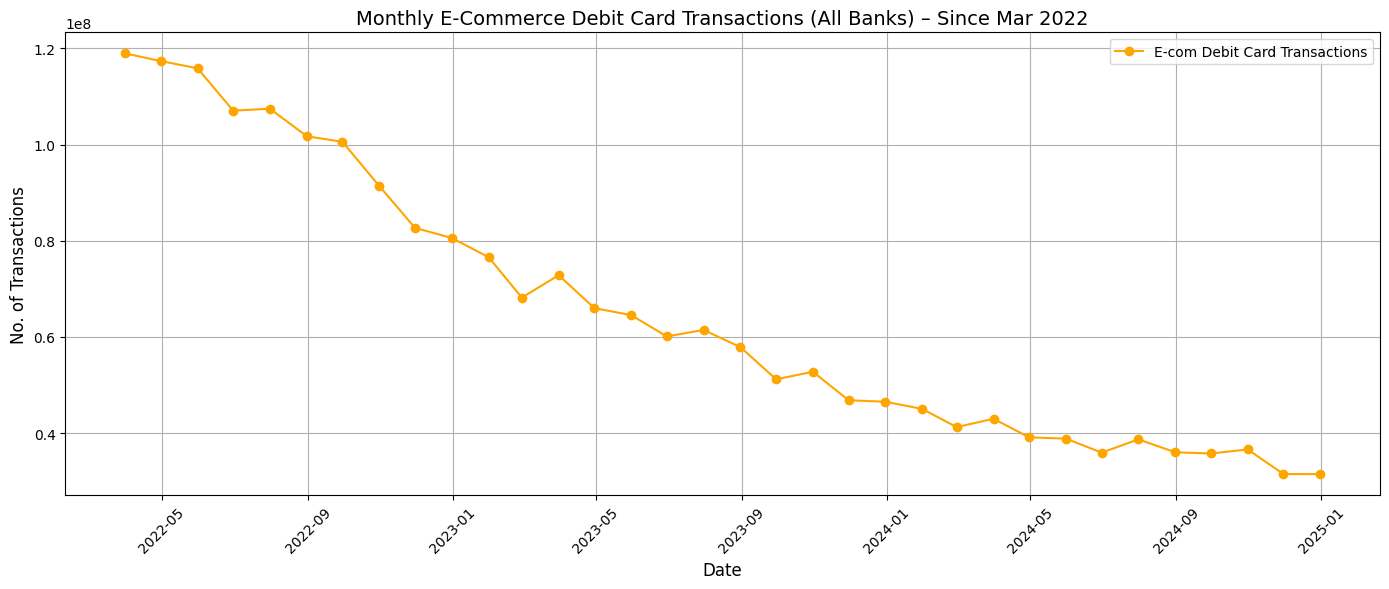

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert e-commerce transaction count to numeric
df['No.of debit transcations via Online(e-com)'] = pd.to_numeric(
    df['No.of debit transcations via Online(e-com)'], errors='coerce')

# Filter from March 2022 onward
df_filtered = df[df['Date'] >= '2022-03-01']

# Group by month and sum total transactions
ecom_trend = df_filtered.groupby('Date')['No.of debit transcations via Online(e-com)'].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(ecom_trend['Date'], ecom_trend['No.of debit transcations via Online(e-com)'],
         marker='o', linestyle='-', color='orange', label='E-com Debit Card Transactions')

plt.title('Monthly E-Commerce Debit Card Transactions (All Banks) – Since Mar 2022', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


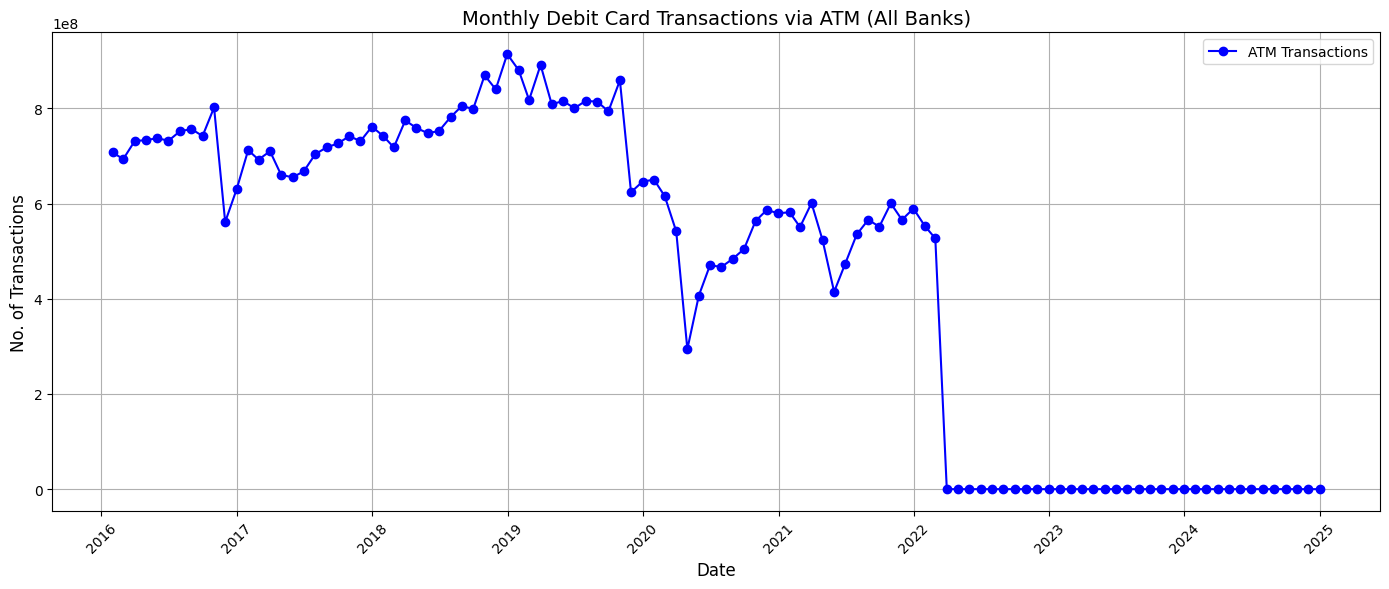

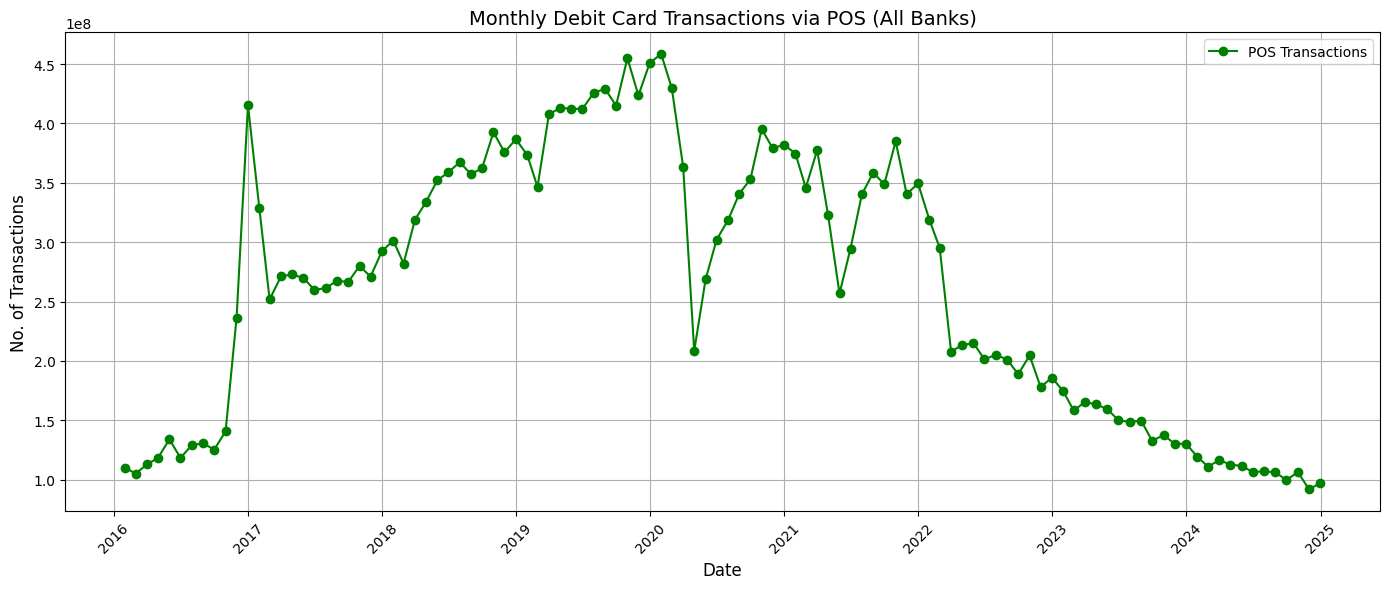

In [ ]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert columns to numeric
df['No.of debit transcations via ATM'] = pd.to_numeric(
    df['No.of debit transcations via ATM'], errors='coerce')

df['No.of debit transcations via POS'] = pd.to_numeric(
    df['No.of debit transcations via POS'], errors='coerce')

# Group by month and sum across all banks
atm_trend = df.groupby('Date')['No.of debit transcations via ATM'].sum().reset_index()
pos_trend = df.groupby('Date')['No.of debit transcations via POS'].sum().reset_index()

# Plot ATM Transactions
plt.figure(figsize=(14,6))
plt.plot(atm_trend['Date'], atm_trend['No.of debit transcations via ATM'],
         marker='o', color='blue', label='ATM Transactions')
plt.title('Monthly Debit Card Transactions via ATM (All Banks)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot POS Transactions
plt.figure(figsize=(14,6))
plt.plot(pos_trend['Date'], pos_trend['No.of debit transcations via POS'],
         marker='o', color='green', label='POS Transactions')
plt.title('Monthly Debit Card Transactions via POS (All Banks)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Time Series Analysis Data Collection

In [ ]:
# Ensure consistent format (optional but helpful if names vary)
df['Bank Name'] = df['Bank Name'].str.strip().str.upper()

# Filter for SBI (State Bank of India)
sbi_df = df[df['Bank Name'].str.contains('STATE BANK OF INDIA', case=False)]

# Preview
sbi_df.head()


,Bank Name,Bank Code,Banktype,Date,Month,Year,ATM(on-site),ATM(off-site),POS(on-line),POS(off-line),...,Amount of credit card transcations via others,No. of Debit Card,No.of debit transcations via ATM,No.of debit transcations via POS,Amount of debit card transactions via ATM(in millions),Amount of debit card transactions via POS(in millions),No.of debit transcations via Online(e-com),Amount of debit transcations via Online(e-com),No.of debit transcations via Others,Amount of debit transcations via Others
22,STATE BANK OF INDIA,B093,Public Sector Banks,2016-01-31,1,2016,19783.0,29216.0,289118.0,0.0,...,NaN,184348293,302493211.0,29712176.0,706067.990697,32828.524353,NaN,NaN,NaN,NaN
78,STATE BANK OF INDIA,B093,Public Sector Banks,2016-02-29,2,2016,20043.0,29261.0,296310.0,0.0,...,NaN,186970791,296735275.0,28469070.0,689132.024490,29445.702250,NaN,NaN,NaN,NaN
134,STATE BANK OF INDIA,B093,Public Sector Banks,2016-03-31,3,2016,20403.0,29321.0,302119.0,0.0,...,NaN,189341852,308423127.0,30331224.0,702058.745966,29956.263635,NaN,NaN,NaN,NaN
190,STATE BANK OF INDIA,B093,Public Sector Banks,2016-04-30,4,2016,20306.0,29418.0,307895.0,0.0,...,NaN,191393900,309235327.0,32648530.0,694301.320782,33188.207206,NaN,NaN,NaN,NaN
246,STATE BANK OF INDIA,B093,Public Sector Banks,2016-05-31,5,2016,20285.0,29495.0,312024.0,0.0,...,NaN,193461984,307780252.0,44189363.0,660952.247499,34014.942725,NaN,NaN,NaN,NaN


###SBI

In [ ]:
sbi_df.to_excel("sbi_data_clean.xlsx", index=False)


In [ ]:
from google.colab import files
files.download("sbi_data_clean.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>